# DSC540_WK00_term_Kim-Schreck

In [1]:
# 00.00.00
# imports

import pandas as pd
import numpy as np
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
import datetime
import statistics
import first
from scipy.stats import poisson
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt
import json
# python 3.x 버전에서 사용 (2.x 버전이라면 from urllib import urlopen)
from urllib.request import urlopen
from PyQt5 import QtWidgets
from PyQt5.QtWidgets import *
import functools as fc
import sys
from bs4 import BeautifulSoup
import mysql.connector
import sqlite3
import time
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Table,Column,Integer,String
import glob
import os
from sqlalchemy import MetaData
from sqlalchemy.orm import mapper
import warnings
warnings.filterwarnings('ignore')

## 03-04_milestone_01

In [2]:
# 01.01.01
# PDF

# DSC540_WK04_term_Schreck-Kim.pdf

In [3]:
# 01.01.02
# github repository for DSC540

# https://github.com/rlawnsdnjs706/DSC540_term

## 05-06_milestone_02

In [4]:
# 02.01.00
# Cleaning/Formatting Flat File Source

In [5]:
# 02.01.00

# Perform at least 5 data transformation and/or cleansing steps to your flat file data. 
# The below examples are not required - they are just potential transformations you could do. 
# If your data doesn't work for these scenarios, complete different transformations. 
# You can do the same transformation multiple times if needed to clean your data. 
# The goal is a clean dataset at the end of the milestone.

In [6]:
# 02.01.01
# import dataset
# dt01

dt01 = pd.read_csv('ROK_demographics_2000-2022.csv')

In [7]:
# 02.01.02
# return head 
# dt01

dt01.head()

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
0,1/1/2000,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,1/1/2000,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,1/1/2000,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,1/1/2000,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,1/1/2000,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2


In [8]:
# 02.01.03
# add index column
# index column to select specific rows 
# dt01

dt01.insert(0, 'ID', range(0, 0 + len(dt01)))

In [9]:
# 02.02.00
# Format data into a more readable format

In [10]:
# 02.02.01
# Replace Headers 
# dt01

dt01.rename(columns={"Date": "calendar_date"}, inplace=True)
dt01.rename(columns={"Region": "region"}, inplace=True)
dt01.rename(columns={"Birth": "date"}, inplace=True)
dt01.rename(columns={"Birth_rate": "rate_birth"}, inplace=True)
dt01.rename(columns={"Death": "death"}, inplace=True)
dt01.rename(columns={"Death_rate": "rate_death"}, inplace=True)
dt01.rename(columns={"Divorce": "divorce"}, inplace=True)
dt01.rename(columns={"Divorce_rate": "rate_divorce"}, inplace=True)
dt01.rename(columns={"Marriage": "marriage"}, inplace=True)
dt01.rename(columns={"Marriage_rate": "rate_marriage"}, inplace=True)
dt01.rename(columns={"Natural_growth": "growth_natural"}, inplace=True)
dt01.rename(columns={"Natural_growth_rate": "rate_growth_natural"}, inplace=True)

In [11]:
# 02.02.02
# return head
# dt01

dt01.head()

,ID,calendar_date,region,date,rate_birth,death,rate_death,divorce,rate_divorce,marriage,rate_marriage,growth_natural,rate_growth_natural
0,0,1/1/2000,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,1,1/1/2000,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,2,1/1/2000,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,3,1/1/2000,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,4,1/1/2000,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2


In [12]:
# 02.02.03
# Fix casing or inconsistent values
# convert integer date column to dates in international format
# US format is incompatible 
# dt01

dt01['calendar_date'] = pd.to_datetime(dt01['calendar_date'], format='%m/%d/%Y')
dt01.head()

,ID,calendar_date,region,date,rate_birth,death,rate_death,divorce,rate_divorce,marriage,rate_marriage,growth_natural,rate_growth_natural
0,0,2000-01-01,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,1,2000-01-01,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,2,2000-01-01,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,3,2000-01-01,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,4,2000-01-01,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2


In [13]:
# 02.03.01
# Conduct Fuzzy Matching
# old romanisation of 'seoul' 
# dt01

st01 = "Sol"
st02 = "Seoul"
FM_ratio_01_02 = fuzz.ratio(st01.lower(),st01.lower())

In [14]:
# 02.03.02
# Conduct Fuzzy Matching
# return ratio 
# dt01

print(FM_ratio_01_02)

100


In [15]:
# 02.03.03
# Conduct Fuzzy Matching
# old romanisation of 'seoul' 
# dt01

st03 = "Sŏl"
st02 = "Seoul"
FM_ratio_03_02 = fuzz.ratio(st03.lower(),st01.lower())

In [16]:
# 02.03.04
# Conduct Fuzzy Matching
# return ratio 
# dt01

print(FM_ratio_03_02)

67


In [17]:
# 02.04.01
# filter Seoul 
# dt01

dt01.set_index("region", inplace = True)
dt01 = dt01.loc["Seoul"]
dt01

,ID,calendar_date,date,rate_birth,death,rate_death,divorce,rate_divorce,marriage,rate_marriage,growth_natural,rate_growth_natural
region,,,,,,,,,,,,
Seoul,15,2000-01-01,12866.0,14.79,3931.0,4.5,1835.0,2.1,6781.0,7.8,8935.0,10.3
Seoul,33,2000-02-01,11797.0,14.48,3218.0,4.0,1912.0,2.3,5596.0,6.9,8579.0,10.5
Seoul,51,2000-03-01,12453.0,14.29,3368.0,3.9,2333.0,2.7,6781.0,7.8,9085.0,10.4
Seoul,69,2000-04-01,10782.0,12.77,3204.0,3.8,1916.0,2.3,6667.0,7.9,7578.0,9.0
Seoul,87,2000-05-01,10817.0,12.39,3064.0,3.5,2108.0,2.4,8428.0,9.7,7753.0,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...
Seoul,4785,2022-02-01,3452.0,4.80,4511.0,6.3,1007.0,1.4,2979.0,4.1,-1059.0,-1.5
Seoul,4803,2022-03-01,4002.0,5.00,6529.0,8.2,1084.0,1.4,2774.0,3.5,-2527.0,-3.2
Seoul,4821,2022-04-01,3603.0,4.70,5351.0,6.9,1056.0,1.4,2844.0,3.7,-1747.0,-2.3


In [18]:
# 02.04.02
# return Seoul 
# dt01

dt01.head()

,ID,calendar_date,date,rate_birth,death,rate_death,divorce,rate_divorce,marriage,rate_marriage,growth_natural,rate_growth_natural
region,,,,,,,,,,,,
Seoul,15,2000-01-01,12866.0,14.79,3931.0,4.5,1835.0,2.1,6781.0,7.8,8935.0,10.3
Seoul,33,2000-02-01,11797.0,14.48,3218.0,4.0,1912.0,2.3,5596.0,6.9,8579.0,10.5
Seoul,51,2000-03-01,12453.0,14.29,3368.0,3.9,2333.0,2.7,6781.0,7.8,9085.0,10.4
Seoul,69,2000-04-01,10782.0,12.77,3204.0,3.8,1916.0,2.3,6667.0,7.9,7578.0,9.0
Seoul,87,2000-05-01,10817.0,12.39,3064.0,3.5,2108.0,2.4,8428.0,9.7,7753.0,8.9


In [19]:
# 02.05.00
# Identify outliers and bad data

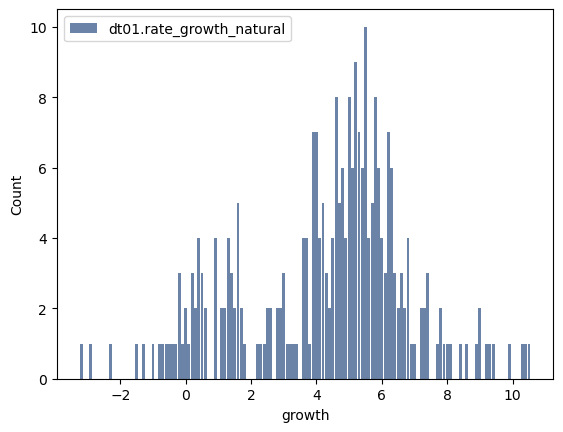

In [20]:
# 02.05.01
# hist of dt_seoul.Natural_growth_rate
# There doesn't seem to be any outliers in the main variable. 
# dt01

dt01_hist01 = thinkstats2.Hist(dt01.rate_growth_natural, label="dt01.rate_growth_natural")
thinkplot.Hist(dt01_hist01)
thinkplot.Config(xlabel="growth", ylabel="Count")

In [21]:
# 02.05.02
# Find duplicates
# return length 
# dt01

print(len(dt01))

270


In [22]:
# 02.05.03
# Find duplicates
# create set 
# dt01

set01 = set(dt01)

In [23]:
# 02.05.04
# Find duplicates
# return set 
# dt01

print(len(set01))

12


In [24]:
# 02.05.05
# Find duplicates 
# dt01

if len(dt01) != len(set01):
    print("duplicates found")
else:
    print("duplicates not found")

duplicates found


In [25]:
# 02.05.06
# Find duplicates
# return number of rows
# duplicates are Seoul only 
# dt01

len(dt01.index)

270

## 07-08_milestone_03

In [26]:
# 03.01.00
# Cleaning/Formatting Website Data

In [27]:
# 03.01.00
# Perform at least 5 data transformation and/or cleansing steps to your website data. 
# The below examples are not required - they are just potential transformations you could do. 
# If your data doesn't work for these scenarios, complete different transformations. 
# You can do the same transformation multiple times if needed to clean your data. 
# The goal is a clean dataset at the end of the milestone.

In [28]:
# 03.01.01
# return head 
# dt01

# dt01.head()

In [29]:
# 03.02.01
# import dataset as 
# dt02

dt02 = pd.read_csv('ROK_income_welfare.csv')

In [30]:
# 03.02.02
# return head 
# dt02

dt02.head()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10


In [31]:
# 03.02.03
# add index column
# index column to select specific rows 
# dt02

dt02.insert(0, 'index', range(0, 0 + len(dt02)))

In [32]:
# 03.02.04
# return head 
# dt02

dt02.head()

,index,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8
1,1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10
2,2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10
3,3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1
4,4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10


In [33]:
# 03.02.05
# Replace Headers 
# replaced three columns 
# dt02

dt02.rename(columns={"family_member": "fam_mem_num"}, inplace=True)
dt02.rename(columns={"year_born": "birth_year"}, inplace=True)
dt02.rename(columns={"reason_none_worker": "unemployment_reason"}, inplace=True)

In [34]:
# 03.02.06
# Replace Headers
# return head dt02

dt02.head()

,index,id,year,wave,region,income,fam_mem_num,gender,birth_year,education_level,marriage,religion,occupation,company_size,unemployment_reason
0,0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8
1,1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10
2,2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10
3,3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1
4,4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10


In [35]:
# 03.03.01
# verify dimensions 
# dt01

print(dt01.shape)

(270, 12)


In [36]:
# 03.03.02
# verify dimensions 
# dt02

print(dt02.shape)

(92857, 15)


In [37]:
# 03.03.03
# verify columns 
# dt01

print(dt01.columns)

Index(['ID', 'calendar_date', 'date', 'rate_birth', 'death', 'rate_death',
       'divorce', 'rate_divorce', 'marriage', 'rate_marriage',
       'growth_natural', 'rate_growth_natural'],
      dtype='object')


In [38]:
# 03.03.04
# verify columns 
# dt02

print(dt02.columns)

Index(['index', 'id', 'year', 'wave', 'region', 'income', 'fam_mem_num',
       'gender', 'birth_year', 'education_level', 'marriage', 'religion',
       'occupation', 'company_size', 'unemployment_reason'],
      dtype='object')


In [39]:
# 03.04.00
# Format data into a more readable format

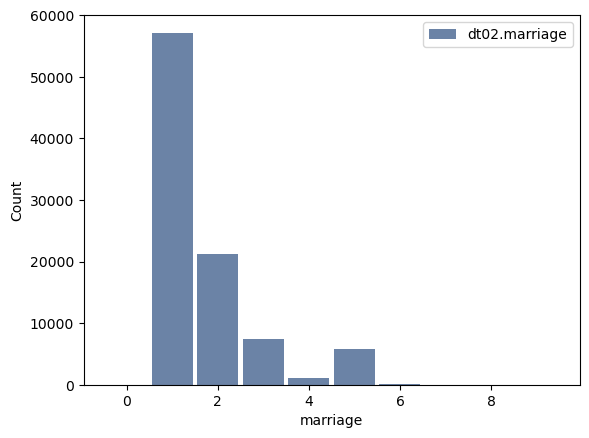

In [40]:
# 03.04.01
# Identify outliers and bad data
# hist of dt_seoul.Natural_growth_rate
# There doesn't seem to be any outliers in the main variable. 
# dt02

dt02_hist01 = thinkstats2.Hist(dt02.marriage, label="dt02.marriage")
thinkplot.Hist(dt02_hist01)
thinkplot.Config(xlabel="marriage", ylabel="Count")

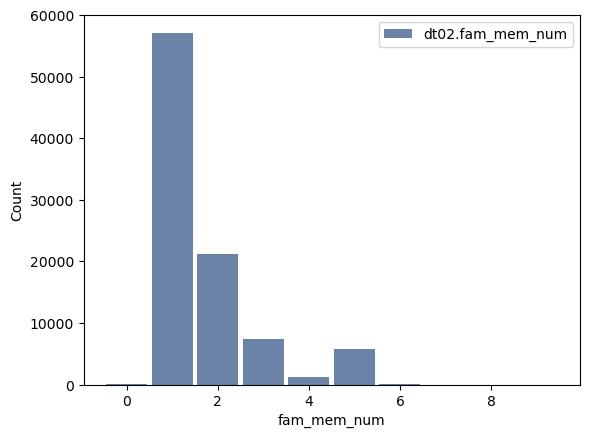

In [41]:
# 03.04.02
# Identify outliers and bad data
# hist of dt_seoul.Natural_growth_rate
# There doesn't seem to be any outliers in the main variable. 
# dt02

dt02_hist01 = thinkstats2.Hist(dt02.marriage, label="dt02.fam_mem_num")
thinkplot.Hist(dt02_hist01)
thinkplot.Config(xlabel="fam_mem_num", ylabel="Count")

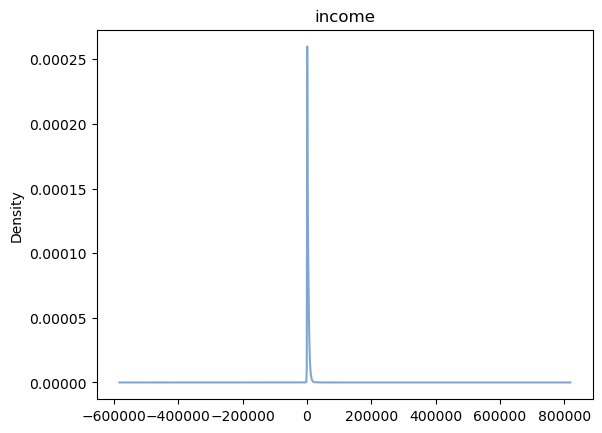

In [42]:
# 03.04.03
# Identify outliers and bad data
# hist of dt_seoul.Natural_growth_rate
# There doesn't seem to be any outliers in the main variable. 
# dt02

dt02.income.plot.density(color='#81A7D1') 
plt.title('income') 
plt.show()

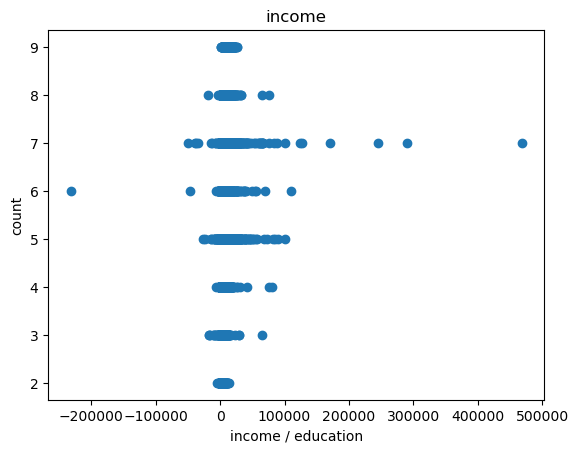

In [43]:
# 03.04.04
# Identify outliers and bad data
# scatter plot of income
# There seem to be a few outliers. 
# dt02

plt.scatter(dt02['income'], dt02['education_level'])
plt.title("income")
plt.xlabel('income / education')
plt.ylabel('count')
plt.show()

In [44]:
# 03.05.01
# Find duplicates
# return length 
# dt02

print(len(dt02))

92857


In [45]:
# 03.05.02
# Find duplicates
# create set 
# dt02

dt02_set02 = set(dt02)

In [46]:
# 03.05.03
# Find duplicates
# return set 
# dt02

print(len(dt02_set02))

15


In [47]:
# 03.05.04
# Find duplicates 
# dt02

if len(dt02) != len(dt02_set02):
    print("duplicates found")
else:
    print("duplicates not found")

duplicates found


In [48]:
# 03.05.05
# Find duplicates
# return number of rows
# dt02

len(dt02.index)

92857

In [49]:
# 03.05.06
# Find duplicates
# remove duplicates
# dt02

dt02_dup = list(set(dt02))

In [50]:
# 03.05.07
# Find duplicates
# return removed duplicates
# dt02

print(str(dt02_dup))

['income', 'education_level', 'index', 'company_size', 'marriage', 'wave', 'region', 'unemployment_reason', 'gender', 'year', 'birth_year', 'fam_mem_num', 'id', 'religion', 'occupation']


In [51]:
# 03.06.01
# remove columns
# dt02

dt02_drp = dt02.drop(['religion', 'occupation', 'unemployment_reason', 'company_size', 'wave'], axis=1)

In [52]:
# 03.06.02
# verify dimensions 
# dt02

print(dt02_drp.shape)

(92857, 10)


In [53]:
# I added a new dataframe containing household incomes for the same demographic in the first dataframe.
# I transformed the data in order to make comparisons on later milestones of the two dataframes.
# I will use my findings to clarify the main culprits contributing to the plummeting birth rate,
# Thus in Milestone four, I will add data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex.
# I hope that this will shed light on what ethical solutions are available for the sake of companies directly affected,
# and moreso the entire economy.

In [54]:
# Make sure you clearly label each transformation step (Step #1, Step #2, etc.) in your code and describe what it is doing in 1-2 sentences. 
# You can submit a Jupyter Notebook or a PDF of your code.
# If you submit a .py file you need to also include a PDF or attachment of your results.

## 09-10_milestone_04

In [55]:
# 04.01.00
# Connecting to an API/Pulling in the Data and Cleaning/Formatting

In [56]:
# 04.01.00
# Perform at least 5 data transformation and/or cleansing steps to your API data. 
# The below examples are not required - they are just potential transformations you could do. 
# If your data doesn't work for these scenarios, complete different transformations. 
# You can do the same transformation multiple times if you needed to clean your data. 
# The goal is a clean dataset at the end of the milestone.

In [57]:
# 04.01.01
# Connecting to an API/Pulling in the Data and Cleaning/Formatting
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt01

# print(dt01)

In [58]:
# 04.01.02
# Connecting to an API/Pulling in the Data and Cleaning/Formatting
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt02

# print(dt02)

In [59]:
# 04.01.03
# Connecting to an API/Pulling in the Data and Cleaning/Formatting
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt03

dt03 = pd.read_csv('2022_Population__Households_and_Housing_Units_20240131140157_2022.csv')

In [60]:
# 04.01.04
# Connecting to an API/Pulling in the Data and Cleaning/Formatting
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt04

dt04 = pd.read_csv('2010_Population__Households_and_Housing_Units_20240131140135_2010.csv')

In [61]:
# 04.01.05
# Connecting to an API/Pulling in the Data and Cleaning/Formatting
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt05

dt05 = pd.read_csv('2005_Population__Households_and_Housing_Units_20240131140110_2005.csv')

In [62]:
# 04.01.06
# Connecting to an API/Pulling in the Data and Cleaning/Formatting
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt06

dt06 = pd.read_csv('2000_Population__Households_and_Housing_Units_by_Administrative_District_20240131140045_2000.csv')

In [63]:
# 04.01.07
# Connecting to an API/Pulling in the Data and Cleaning/Formatting
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt07

dt07 = pd.read_csv('1995_Population__households_by_administrative_district_20240131140017_1995.csv')

In [64]:
# 04.01.08
# Connecting to an API/Pulling in the Data and Cleaning/Formatting
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt08

dt08 = pd.read_csv('1990_Population__households_by_administrative_district_20240131135955_1990.csv')

In [65]:
# 04.01.09
# Connecting to an API/Pulling in the Data and Cleaning/Formatting
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt09

dt09 = pd.read_csv('1985_Population__households_by_administrative_district_20240131135838_1985.csv')

In [66]:
# 04.01.10
# Connecting to an API/Pulling in the Data and Cleaning/Formatting
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt10

dt10 = pd.read_csv('1980_Population__households_by_administrative_district_20240131135914_1980.csv')

In [67]:
# 04.01.11
# Connecting to an API/Pulling in the Data and Cleaning/Formatting
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt11

dt11 = pd.read_csv('1975_Population__households_by_administrative_district_20240131135816_1975.csv')

In [68]:
# 04.01.12
# Connecting to an API/Pulling in the Data and Cleaning/Formatting
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt12

dt12 = pd.read_csv('1970_Population__households_by_administrative_district_20240131135736_1970.csv')

In [69]:
# 04.02.01
# return head 
# dt01

dt01.head()

,ID,calendar_date,date,rate_birth,death,rate_death,divorce,rate_divorce,marriage,rate_marriage,growth_natural,rate_growth_natural
region,,,,,,,,,,,,
Seoul,15,2000-01-01,12866.0,14.79,3931.0,4.5,1835.0,2.1,6781.0,7.8,8935.0,10.3
Seoul,33,2000-02-01,11797.0,14.48,3218.0,4.0,1912.0,2.3,5596.0,6.9,8579.0,10.5
Seoul,51,2000-03-01,12453.0,14.29,3368.0,3.9,2333.0,2.7,6781.0,7.8,9085.0,10.4
Seoul,69,2000-04-01,10782.0,12.77,3204.0,3.8,1916.0,2.3,6667.0,7.9,7578.0,9.0
Seoul,87,2000-05-01,10817.0,12.39,3064.0,3.5,2108.0,2.4,8428.0,9.7,7753.0,8.9


In [70]:
# 04.02.02
# return head 
# dt02

dt02.head()

,index,id,year,wave,region,income,fam_mem_num,gender,birth_year,education_level,marriage,religion,occupation,company_size,unemployment_reason
0,0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8
1,1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10
2,2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10
3,3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1
4,4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10


In [71]:
# 04.02.03
# return head 
# dt03

dt03.head()

,"By administrative divisions(eup, myeon, dong)",2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9,2022.10,2022.11,2022.12,2022.13,2022.14,2022.15,2022.16,2022.17,2022.18,2022.19
0,"By administrative divisions(eup, myeon, dong)",Total population (Person),Male (Person),Female (Person),Korean - total (Person),Korean - male (Person),Korean - Female (Person),Foreigner-Total (Person),Foreigner-Male (Person),Foreigner-Female (Person),Household-Total (households),Type of occupancy (households),Institutional households (households),Foreigner household (households),Housing units-Total (Housing),Detached dwelling (Housing),Apartment (Housing),Row house (Housing),Apartment unit ina private house (Housing),House within commercial building (Housing),Living quaters other than housing unit (Housing)
1,Whole country,51692272,25835298,25856974,49939926,24866514,25073412,1752346,968784,783562,22383187,21773507,17212,592468,19155585,3860997,12268973,530985,2283238,211392,1162311
2,Total for eups,5098892,2621409,2477483,4879206,2484040,2395166,219686,137369,82317,2162312,2096426,2473,63413,2050655,583479,1210871,81057,143781,31467,81935
3,Total for myeons,4506486,2348865,2157621,4244198,2162250,2081948,262288,186615,75673,2101117,2035906,4051,61160,2113084,1543756,426992,37634,72426,32276,110037
4,Total for dongs,42086894,20865024,21221870,40816522,20220224,20596298,1270372,644800,625572,18119758,17641175,10688,467895,14991846,1733762,10631110,412294,2067031,147649,970339


In [72]:
# 04.02.04
# return head 
# dt04

dt04.head()

,"By administrative divisions(eup, myeon, dong)",2010,2010.1,2010.2,2010.3,2010.4,2010.5,2010.6,2010.7,2010.8,2010.9,2010.10,2010.11,2010.12,2010.13,2010.14,2010.15,2010.16,2010.17,2010.18,2010.19
0,"By administrative divisions(eup, myeon, dong)",Total population (Person),Male (Person),Female (Person),Korean - total (Person),Korean - male (Person),Korean - Female (Person),Foreigner-Total (Person),Foreigner-Male (Person),Foreigner-Female (Person),Household-Total (households),Type of occupancy (households),Institutional households (households),Foreigner household (households),Housing units-Total (Housing),Detached dwelling (Housing),Apartment (Housing),Row house (Housing),Apartment unit ina private house (Housing),House within commercial building (Housing),Living quaters other than housing unit (Housing)
1,Whole country,48580293,24167098,24413195,47990761,23840896,24149865,589532,326202,263330,17574067,17339422,20727,213918,14677419,4089491,8576013,536070,1314452,161393,303097
2,Total for dongs,39822647,19798739,20023908,39363373,19558869,19804504,459274,239870,219404,14224508,14031069,12420,181019,11262799,2006683,7487900,425615,1226377,116224,270518
3,Total for eups,4200082,2117515,2082567,4149215,2086063,2063152,50867,31452,19415,1504690,1487490,2631,14569,1460243,544997,765456,73145,57696,18949,9816
4,Total for myeons,4557564,2250844,2306720,4478173,2195964,2282209,79391,54880,24511,1844869,1820863,5676,18330,1954377,1537811,322657,37310,30379,26220,22763


In [73]:
# 04.02.05
# return head 
# dt05

dt05.head()

,By administrative divisions,2005,2005.1,2005.2,2005.3,2005.4,2005.5,2005.6,2005.7,2005.8,2005.9,2005.10,2005.11,2005.12,2005.13,2005.14,2005.15,2005.16,2005.17,2005.18,2005.19
0,By administrative divisions,Total population (Person),Male (Person),Female (Person),Population(Korean) (Person),Korean male (Person),Korean female (Person),Foreigner (Person),Foreigner male (Person),Foreigner female (Person),Household (households),Type of occupancy (households),Institutional households (households),Foreigner household (households),Housing units (Housing),Detached dwelling (Housing),Apartment (Housing),Row house (Housing),Apartment unit ina private house (Housing),House within commercial building (Housing),Living quaters other than housing unit (Housing)
1,Whole country,47278951,23623954,23654997,47041434,23465650,23575784,237517,158304,79213,15988274,15887128,16551,84595,13222641,4263541,6962689,558513,1229208,208690,206511
2,Dong area,38514753,19258840,19255913,38337699,19145912,19191787,177054,112928,64126,12826173,12744940,10413,70820,9997532,2124135,6122716,444243,1155568,150870,184683
3,Eup area,3943827,1987814,1956013,3922597,1972126,1950471,21230,15688,5542,1326369,1318939,2129,5301,1293996,557871,585636,76494,46255,27740,7433
4,Myeon area,4820371,2377300,2443071,4781138,2347612,2433526,39233,29688,9545,1835732,1823249,4009,8474,1931113,1581535,254337,37776,27385,30080,14395


In [74]:
# 04.02.06
# return head 
# dt06

dt06.head()

,By administrative divisions,2000,2000.1,2000.2,2000.3,2000.4,2000.5,2000.6,2000.7,2000.8,2000.9,2000.10,2000.11,2000.12,2000.13,2000.14,2000.15,2000.16,2000.17,2000.18,2000.19
0,By administrative divisions,Total population (Person),Male (Person),Female (Person),Korean (Person),Male (Person),Korean female (Person),Foreigner (Person),Foreigner male (Person),Foreigner female (Person),Household (households),Type of occupancy (households),Institutional households (households),Foreigner household (households),Housing units (Housing),Detached dwelling (Housing),Apartment (Housing),Row house (Housing),Apartment unit ina private house (Housing),Dwelling units in a building not intended for ...,Living quaters other than housing unit (Housing)
1,Whole country,46136101,23158582,22977519,45985289,23068181,22917108,150812,90401,60411,14391374,14311807,14417,65150,11472401,4269180,5479828,849687,472236,401470,91814
2,Eup area,3755782,1885263,1870519,3742053,1876875,1865178,13729,8388,5341,1167229,1160332,1921,4976,1094042,532261,403807,81115,20229,56630,7254
3,Myeon area,5625175,2789180,2835995,5600788,2773484,2827304,24387,15696,8691,1933536,1921999,3380,8157,1985026,1608093,231209,52308,17600,75816,16805
4,Dong area,36755144,18484139,18271005,36642448,18417822,18224626,112696,66317,46379,11290609,11229476,9116,52017,8393333,2128826,4844812,716264,434407,269024,67755


In [75]:
# 04.02.07
# return head 
# dt07

dt07.head()

,By administrative divisions,1995,1995.1,1995.2,1995.3,1995.4,1995.5,1995.6,1995.7,1995.8,1995.9,1995.10,1995.11,1995.12,1995.13,1995.14,1995.15,1995.16
0,By administrative divisions,Total population (Person),Male (Person),Female (Person),Korean (Person),Male (Person),Female (Person),Ordinary household (households),Ordinary household members (Person),Ordinary household members(male) (Person),Ordinary household members(female) (Person),Institutional household members (Person),Institutional household members(male) (Person),Institutional household members(female) (Person),Foreigner households (households),Foreigner household member (Person),Foreigner household member(male) (Person),Foreigner household(female) (Person)
1,Whole country,44608726,22389324,22219402,44553710,22357352,22196358,12958181,44028108,22046400,21981708,525602,310952,214650,17110,55016,31972,23044
2,Eup area,3484148,1742046,1742102,3480784,1740064,1740720,1014190,3413879,1703581,1710298,66905,36483,30422,1102,3364,1982,1382
3,Myeon area,6088105,3025970,3062135,6080962,3021565,3059397,1912013,5966862,2953745,3013117,114100,67820,46280,1635,7143,4405,2738
4,Dong area,35036473,17621308,17415165,34991964,17595723,17396241,10031978,34647367,17389074,17258293,344597,206649,137948,14373,44509,25585,18924


In [76]:
# 04.02.08
# return head 
# dt08

dt08.head()

,By administrative divisions,1990,1990.1,1990.2,1990.3,1990.4,1990.5,1990.6,1990.7,1990.8,1990.9,1990.10,1990.11,1990.12,1990.13,1990.14,1990.15,1990.16
0,By administrative divisions,Total population (Person),Male (Person),Female (Person),Korean (Person),Male (Person),Female (Person),Ordinary household (households),Ordinary household members (Person),Ordinary household members(male) (Person),Ordinary household members(female) (Person),Institutional household members (Person),Institutional household members(male) (Person),Institutional household members(female) (Person),Foreigner households (households),Foreigner household member (Person),Foreigner household member(male) (Person),Foreigner household(female) (Person)
1,Whole country,43410899,21782154,21628745,43390374,21770919,21619455,11354540,42782526,21446690,21335836,607848,324229,283619,6556,20525,11235,9290
2,City area,32308970,16199493,16109477,32290055,16189140,16100915,8462417,31856255,15964971,15891284,433800,224169,209631,6051,18915,10353,8562
3,Eup area,3603647,1804648,1798999,3602462,1804027,1798435,917171,3542464,1773650,1768814,59998,30377,29621,357,1185,621,564
4,Myeon area,7498282,3778013,3720269,7497857,3777752,3720105,1974952,7383807,3708069,3675738,114050,69683,44367,148,425,261,164


In [77]:
# 04.02.09
# return head 
# dt09

dt09.head()

,By administrative divisions,1985,1985.1,1985.2,1985.3,1985.4,1985.5,1985.6,1985.7,1985.8,1985.9,1985.10,1985.11,1985.12,1985.13,1985.14,1985.15,1985.16
0,By administrative divisions,Total population (Person),Male (Person),Female (Person),Korean (Person),Male (Person),Female (Person),Ordinary household (households),Ordinary household members (Person),Ordinary household members(male) (Person),Ordinary household members(female) (Person),Institutional household members (Person),Institutional household members(male) (Person),Institutional household members(female) (Person),Foreigner households (households),Foreigner household member (Person),Foreigner household member(male) (Person),Foreigner household(female) (Person)
1,Whole country,40448486,20243765,20204721,40419652,20227564,20192088,9571361,39772679,19925681,19846998,646973,301883,345090,10694,28834,16201,12633
2,City area,26442980,13168116,13274864,26417972,13154130,13263842,6330798,25931647,12940071,12991576,486325,214059,272266,9302,25008,13986,11022
3,Eup area,4817236,2421338,2395898,4814407,2419709,2394698,1106070,4738350,2377837,2360513,76057,41872,34185,1029,2829,1629,1200
4,Myeon area,9188270,4654311,4533959,9187273,4653725,4533548,2134493,9102682,4607773,4494909,84591,45952,38639,363,997,586,411


In [78]:
# 04.02.10
# return head 
# dt10

dt10.head()

,By administrative divisions,1980,1980.1,1980.2,1980.3,1980.4,1980.5,1980.6,1980.7,1980.8,1980.9,1980.10,1980.11,1980.12,1980.13,1980.14,1980.15,1980.16
0,By administrative divisions,Total population (Person),Male (Person),Female (Person),Korean (Person),Male (Person),Female (Person),Ordinary household (households),Ordinary household members (Person),Ordinary household members(male) (Person),Ordinary household members(female) (Person),Institutional household members (Person),Institutional household members(male) (Person),Institutional household members(female) (Person),Foreigner households (households),Foreigner household member (Person),Foreigner household member(male) (Person),Foreigner household(female) (Person)
1,Whole country,37436315,18767201,18669114,37406815,18749306,18657509,7969201,36843251,18523047,18320204,563564,226259,337305,9404,29500,17895,11605
2,City area,21434116,10713025,10721091,21409453,10697846,10711607,4669976,20976955,10526940,10450015,432498,170906,261592,8172,24663,15179,9484
3,Eup area,4539666,2277850,2261816,4536826,2276333,2260493,935720,4479937,2252076,2227861,56889,24257,32632,628,2840,1517,1323
4,Myeon area,11462533,5776326,5686207,11460536,5775127,5685409,2363505,11386460,5744131,5642329,74177,31096,43081,602,1997,1199,798


In [79]:
# 04.02.11
# return head 
# dt11

dt11.head()

,By administrative divisions,1975,1975.1,1975.2,1975.3,1975.4,1975.5,1975.6,1975.7,1975.8,1975.9,1975.10,1975.11
0,By administrative divisions,Household (households),Korean (households),Foreigner household (households),Population (Person),Male (Person),Female (Person),Korean (Person),Male (Person),Korean female (Person),Foreigner (Person),Foreigner male (Person),Foreigner female (Person)
1,Whole country,6761239,6754257,6982,34706620,17461244,17245376,34678972,17445246,17233726,27648,15998,11650
2,City area,3418290,3412640,5650,16792771,8383271,8409500,16769946,8369909,8400037,22825,13362,9463
3,Eup area,722593,721911,682,3723354,1876381,1846973,3720417,1874848,1845569,2937,1533,1404
4,Myeon area,2620356,2619706,650,14187007,7198257,6988750,14185121,7197154,6987967,1886,1103,783


In [80]:
# 04.02.12
# return head 
# dt12

dt12.head()

,By administrative divisions,1970,1970.1,1970.2,1970.3,1970.4,1970.5,1970.6,1970.7,1970.8,1970.9,1970.10,1970.11
0,By administrative divisions,Household (households),Korean (households),Foreigner household (households),Population (Person),Male (Person),Female (Person),Korean (Person),Male (Person),Korean female (Person),Foreigner (Person),Foreigner male (Person),Foreigner female (Person)
1,Whole country,5863440,5856901,6539,30882386,15216002,15666384,30851984,15199940,15652044,30402,16062,14340
2,City area,2530080,2525039,5041,12709513,6257068,6452445,12685143,6244207,6440936,24370,12861,11509
3,Eup area,532573,531775,798,2800456,1379438,1421018,2796872,1377559,1419313,3584,1879,1705
4,Myeon area,2800787,2800087,700,15372417,7579496,7792921,15369969,7578174,7791795,2448,1322,1126


In [81]:
# 04.03.01
# Replace Headers
# dt03

dt03.rename(columns={"2022": "2022_ttl"}, inplace=True)

In [82]:
# 04.03.02
# return head 
# dt03

print(dt03.head())

   By administrative divisions(eup, myeon, dong)  ...                                           2022.19
0  By administrative divisions(eup, myeon, dong)  ...  Living quaters other than housing unit (Housing)
1                                  Whole country  ...                                           1162311
2                                 Total for eups  ...                                             81935
3                               Total for myeons  ...                                            110037
4                                Total for dongs  ...                                            970339

[5 rows x 21 columns]


In [83]:
# 04.04.01
# Replace Headers
# dt04

dt04.rename(columns={"2010": "2010_ttl"}, inplace=True)

In [84]:
# 04.04.02
# return head 
# dt04

print(dt04.head())

   By administrative divisions(eup, myeon, dong)  ...                                           2010.19
0  By administrative divisions(eup, myeon, dong)  ...  Living quaters other than housing unit (Housing)
1                                  Whole country  ...                                            303097
2                                Total for dongs  ...                                            270518
3                                 Total for eups  ...                                              9816
4                               Total for myeons  ...                                             22763

[5 rows x 21 columns]


In [85]:
# 04.05.01
# Replace Headers
# dt05

dt05.rename(columns={"2005": "2005_ttl"}, inplace=True)

In [86]:
# 04.05.02
# return head 
# dt05

print(dt05.head())

   By administrative divisions  ...                                           2005.19
0  By administrative divisions  ...  Living quaters other than housing unit (Housing)
1                Whole country  ...                                            206511
2                    Dong area  ...                                            184683
3                     Eup area  ...                                              7433
4                   Myeon area  ...                                             14395

[5 rows x 21 columns]


In [87]:
# 04.06.01
# Replace Headers
# dt06

dt06.rename(columns={"2000": "2000_ttl"}, inplace=True)

In [88]:
# 04.06.02
# return head 
# dt06

print(dt06.head())

   By administrative divisions  ...                                           2000.19
0  By administrative divisions  ...  Living quaters other than housing unit (Housing)
1                Whole country  ...                                             91814
2                     Eup area  ...                                              7254
3                   Myeon area  ...                                             16805
4                    Dong area  ...                                             67755

[5 rows x 21 columns]


In [89]:
# 04.07.01
# Replace Headers 
# dt07

dt07.rename(columns={"1995": "1995_ttl"}, inplace=True)

In [90]:
# 04.07.02
# return head 
# dt07

print(dt07.head())

   By administrative divisions  ...                               1995.16
0  By administrative divisions  ...  Foreigner household(female) (Person)
1                Whole country  ...                                 23044
2                     Eup area  ...                                  1382
3                   Myeon area  ...                                  2738
4                    Dong area  ...                                 18924

[5 rows x 18 columns]


In [91]:
# 04.08.01
# Replace Headers 
# dt08

dt08.rename(columns={"1990": "1990_ttl"}, inplace=True)

In [92]:
# 04.08.02
# return head 
# dt08

print(dt08.head())

   By administrative divisions  ...                               1990.16
0  By administrative divisions  ...  Foreigner household(female) (Person)
1                Whole country  ...                                  9290
2                    City area  ...                                  8562
3                     Eup area  ...                                   564
4                   Myeon area  ...                                   164

[5 rows x 18 columns]


In [93]:
# 04.09.01
# Replace Headers 
# dt09

dt09.rename(columns={"1985": "1985_ttl"}, inplace=True)

In [94]:
# 04.09.02
# return head 
# dt09

print(dt09.head())

   By administrative divisions  ...                               1985.16
0  By administrative divisions  ...  Foreigner household(female) (Person)
1                Whole country  ...                                 12633
2                    City area  ...                                 11022
3                     Eup area  ...                                  1200
4                   Myeon area  ...                                   411

[5 rows x 18 columns]


In [95]:
# 04.10.01
# Replace Headers 
# dt10

dt10.rename(columns={"1980": "1980_ttl"}, inplace=True)

In [96]:
# 04.10.02
# return head 
# dt10

print(dt10.head())

   By administrative divisions  ...                               1980.16
0  By administrative divisions  ...  Foreigner household(female) (Person)
1                Whole country  ...                                 11605
2                    City area  ...                                  9484
3                     Eup area  ...                                  1323
4                   Myeon area  ...                                   798

[5 rows x 18 columns]


In [97]:
# 04.11.01
# Replace Headers 
# dt11

dt11.rename(columns={"1975": "1975_ttl"}, inplace=True)

In [98]:
# 04.11.02
# return head 
# dt11

print(dt11.head())

   By administrative divisions  ...                    1975.11
0  By administrative divisions  ...  Foreigner female (Person)
1                Whole country  ...                      11650
2                    City area  ...                       9463
3                     Eup area  ...                       1404
4                   Myeon area  ...                        783

[5 rows x 13 columns]


In [99]:
# 04.12.01
# Replace Headers 
# dt12

dt12.rename(columns={"1970": "1970_ttl"}, inplace=True)

In [100]:
# 04.12.02
# return head 
# dt12

print(dt12.head())

   By administrative divisions  ...                    1970.11
0  By administrative divisions  ...  Foreigner female (Person)
1                Whole country  ...                      14340
2                    City area  ...                      11509
3                     Eup area  ...                       1705
4                   Myeon area  ...                       1126

[5 rows x 13 columns]


In [101]:
# 04.13.01
# 클릭한 목록에 대한 하위 목록 생성
# return URL
# KOSIS.kr API
# func init self
# dt13

class NewWindow(QtWidgets.QMainWindow):
    def __init__(self, parent=None):
        super(NewWindow, self).__init__(parent)
        centralWidget = QWidget()
        self.setCentralWidget(centralWidget)
        self.setGeometry(300, 300, 500, 500)

        Setting(self, List_Id)

In [102]:
# 04.13.02
# 최상위 목록 생성
# return URL
# KOSIS.kr API
# func init self
# dt13

class MyWindow(QtWidgets.QMainWindow, QPushButton):
    def __init__(self):
        super(MyWindow, self).__init__()
        centralWidget = QWidget()
        self.setCentralWidget(centralWidget)
        self.setGeometry(200, 200, 500, 500)
        self.setStyleSheet("background-color: white")

        Setting(self, 'A')

In [103]:
# 04.13.03
# 목록 셋팅 함수
# return URL
# KOSIS.kr API
# func Setting
# dt13

def Setting(self, parentId):
    # url을 통해 json 데이터 가져오기
    # return json data via url
    with urlopen(
            "https://kosis.kr/openapi/statisticsList.do?method=getList&apiKey=ZjZjOTI3MjRjNmU1YzdhZTMwOWRjNjgxN2MzNDgwNmY=&vwCd=MT_ZTITLE&parentListId="+parentId+"&format=json&jsonVD=Y") as url:
        json_file = url.read()

    py_json = json.loads(json_file.decode('utf-8'))

    # 하위 목록이 있다면 LinkButton
    # 하위 목록이 없다면 label로 생성
    # if/else link/label
    for i, v in enumerate(py_json):
        if 'LIST_NM' in v:
            btn = QCommandLinkButton(v['LIST_NM'], self)
            btn.setStyleSheet("Text-align: left;"
                             "border: none;"
                             )
            btn.setGeometry(100, 50 * i, 500, 40)
            btn.clicked.connect(fc.partial(Action, self, v['LIST_ID']))
        else:
            lbl = QLabel(v['TBL_NM'], self)
            lbl.setGeometry(100, 50 * i, 500, 40)

In [104]:
# 04.13.04
# 클릭한 목록에 대한 하위 목록 생성
# return URL
# KOSIS.kr API
# func Action
# dt13

# def Action(self, check):
#     global List_Id
#     List_Id = check

#     NewWindow(self).show()

# if __name__ == "__main__":
#     app = QtWidgets.QApplication(sys.argv)
#     window = MyWindow()
#     window.show()
#     sys.exit(app.exec_())

In [105]:
# 04.13.05
# return URL
# KOSIS.kr API
# dt13

import requests
resp = requests.get('https://kosis.kr/openapi/statisticsList.do?method=getList&apiKey=MzA4MTgyY2I2Y2VhMDc1ODI5OTU0M2UxYzQyMTAxNjA=&vwCd=MT_ETITLE&parentListId=A&format=json&jsonVD=Y')
for resp in resp.history:
    print(resp.url)

In [106]:
# 04.13.06
# return url
# assign variables
# dt13

dt13_urls = 'https://kosis.kr'
dt13_grab = requests.get(dt13_urls)
dt13_soup = BeautifulSoup(dt13_grab.text, 'html.parser')

In [107]:
# 04.13.07
# opening a file in write mode
# dt13

dt13_f = open("dt13.txt", "w")

In [108]:
# 04.13.08
# traverse paragraphs from soup
# dt13

for link in dt13_soup.find_all("a"):
    dt13_data = link.get('href')
    dt13_f.write(dt13_data)
    dt13_f.write("\n")

dt13_f.close()

In [109]:
# 04.13.09
# assign variable for dt13
# read txt file
# dt13

dt13_txt = open('dt13.txt', 'r')
print(dt13_txt.read())

#gnb
#main_layout
javascript:void(0)
javascript:void(0)
javascript:void(0)
javascript:void(0)
/index/index.do
javascript:void(0)
javascript:void(0)
javascript:void(0)
javascript:void(0)
javascript:void(0)
javascript:void(0)
javascript:void(0)
javascript:void(0)
javascript:void(0)
javascript:void(0)
http://kosis.kr/easyViewStatis/customStatisIndex.do?vwcd=MT_TM1_TITLE&menuId=M_03_01
http://kosis.kr/easyViewStatis/customStatisIndex.do?vwcd=MT_TM1_TITLE&menuId=M_03_01
http://kosis.kr/easyViewStatis/customStatisIndex.do?vwcd=MT_TM2_TITLE&menuId=M_03_02
http://kosis.kr/easyViewStatis/visualizationIndex.do
http://kosis.kr/publication/publicationThema.do
http://kosis.kr/publication/publicationThema.do
http://kosis.kr/publication/publicationWord.do
http://kosis.kr/publication/publicationStat.do
http://kosis.kr/civilComplaint/faqList.do
http://kosis.kr/civilComplaint/faqList.do
http://kosis.kr/civilComplaint/qnaList.do
http://kosis.kr/civilComplaint/kosisGuideIndex.do
http://kosis.kr/civilCompl

In [110]:
# 04.14.00
# Format data into a more readable format

In [111]:
# 04.14.00
# Identify outliers and bad data

In [112]:
# 04.14.01
# Find duplicates
# return length
# dt01

print(len(dt01))

270


In [113]:
# 04.14.02
# Find duplicates
# create set
# dt01

dt01_set01 = set(dt01)

In [114]:
# 04.14.03
# Find duplicates
# dt01

if len(dt01) != len(dt01_set01):
    print('duplicates found')
else:
    print('duplicates not found')

duplicates found


In [115]:
# 04.14.04
# Find duplicates
# return number of rows
# dt01

len(dt01.index)

270

In [116]:
# 04.14.05
# Find duplicates
# remove duplicates
# dt01

dt01_dup = list(set(dt01))

In [117]:
# 04.14.06
# Find duplicates
# return removed duplicates
# dt01

print(str(dt01_dup))

['calendar_date', 'rate_marriage', 'rate_birth', 'ID', 'marriage', 'date', 'death', 'rate_growth_natural', 'divorce', 'growth_natural', 'rate_death', 'rate_divorce']


In [118]:
# 04.15.01
# Find duplicates
# return length
# dt02

print(len(dt02))

92857


In [119]:
# 04.15.02
# Find duplicates
# create set
# dt02

dt02_set02 = set(dt02)

In [120]:
# 04.16.01
# Find duplicates
# dt01

if len(dt02) != len(dt02_set02):
    print('duplicates found')
else:
    print('duplicates not found')

duplicates found


In [121]:
# 04.17.01
# Find duplicates
# return number of rows
# dt02

len(dt02.index)

92857

In [122]:
# 04.17.02
# Find duplicates
# remove duplicates
# dt02

dt02_dup = list(set(dt02))

In [123]:
# 04.17.03
# Find duplicates
# return removed duplicates
# dt02

print(str(dt02_dup))

['income', 'education_level', 'index', 'company_size', 'marriage', 'wave', 'region', 'unemployment_reason', 'gender', 'year', 'birth_year', 'fam_mem_num', 'id', 'religion', 'occupation']


In [124]:
# 04.17.04
# remove columns
# dt02

dt02_drp = dt02.drop(['religion', 'occupation', 'unemployment_reason', 'company_size', 'wave'], axis=1)

In [125]:
# 04.17.05
# verify dimensions
# dt02

print(dt02.shape)

(92857, 15)


In [126]:
# 04.18.01
# Find duplicates
# return length
# dt03

print(len(dt03))

325


In [127]:
# 04.18.02
# Find duplicates
# create set
# dt03

dt03_set03 = set(dt03)

In [128]:
# 04.18.03
# Find duplicates
# return set
# dt03

print(len(dt03_set03))

21


In [129]:
# 04.18.04
# Find duplicates
# dt03

if len(dt03) != len(dt03_set03):
    print('duplicates found')
else:
    print('duplicates not found')

duplicates found


In [130]:
# 04.18.05
# Find duplicates
# return number of rows
# dt03

len(dt03.index)

325

In [131]:
# 04.18.06
# Find duplicates
# remove duplicates
# dt03

dt03_dup = list(set(dt03))

In [132]:
# 04.18.07
# Find duplicates
# return removed duplicates
# dt03

print(str(dt03_dup))

['2022.10', '2022.1', '2022_ttl', '2022.8', '2022.2', '2022.12', '2022.9', '2022.3', '2022.7', '2022.13', '2022.5', 'By administrative divisions(eup, myeon, dong)', '2022.6', '2022.15', '2022.19', '2022.16', '2022.17', '2022.18', '2022.14', '2022.11', '2022.4']


In [133]:
# 04.18.08
# Find duplicates
# verify dimensions
# dt03

print(dt03.shape)

(325, 21)


In [134]:
# 04.19.01
# create function to locate and remove duplicates
# 1 parameter dtx
# return duplicates list
# return dimensions

def rem_dup(dt_x01):
    dt_x02 = set(dt_x01)
    if len(dt_x01) != len(dt_x02):
        len(dt_x01.index)
        dt_x03 = list(set(dt_x01))
        print(str(dt_x03))
        print(dt_x01.shape)
    else:
        print('no duplicates found')
        print(dt_x01.shape)

In [135]:
# 04.20.01
# Find duplicates
# dt01

rem_dup(dt01)

['calendar_date', 'rate_marriage', 'rate_birth', 'ID', 'marriage', 'date', 'death', 'rate_growth_natural', 'divorce', 'growth_natural', 'rate_death', 'rate_divorce']
(270, 12)


In [136]:
# 04.20.02
# Find duplicates
# dt02

rem_dup(dt02)

['income', 'education_level', 'index', 'company_size', 'marriage', 'wave', 'region', 'unemployment_reason', 'gender', 'year', 'birth_year', 'fam_mem_num', 'id', 'religion', 'occupation']
(92857, 15)


In [137]:
# 04.20.03
# Find duplicates
# dt03

rem_dup(dt03)

['2022.10', '2022.1', '2022_ttl', '2022.8', '2022.2', '2022.12', '2022.9', '2022.3', '2022.7', '2022.13', '2022.5', 'By administrative divisions(eup, myeon, dong)', '2022.6', '2022.15', '2022.19', '2022.16', '2022.17', '2022.18', '2022.14', '2022.11', '2022.4']
(325, 21)


In [138]:
# 04.20.04
# Find duplicates
# dt04

rem_dup(dt04)

no duplicates found
(21, 21)


In [139]:
# 04.20.05
# Find duplicates
# dt05

rem_dup(dt05)

no duplicates found
(21, 21)


In [140]:
# 04.20.06
# Find duplicates
# dt06

rem_dup(dt06)

no duplicates found
(21, 21)


In [141]:
# 04.20.07
# Find duplicates
# dt07

rem_dup(dt07)

['1995.10', '1995.5', '1995.15', '1995.3', '1995.8', '1995.2', '1995.6', '1995.7', '1995.13', '1995.12', '1995.14', '1995.1', 'By administrative divisions', '1995.9', '1995.4', '1995.11', '1995.16', '1995_ttl']
(20, 18)


In [142]:
# 04.20.08
# Find duplicates
# dt08

rem_dup(dt08)

['1990.12', '1990.11', '1990.13', '1990.6', '1990.2', '1990.4', '1990.14', '1990.16', '1990_ttl', '1990.8', '1990.10', 'By administrative divisions', '1990.3', '1990.1', '1990.7', '1990.9', '1990.15', '1990.5']
(20, 18)


In [143]:
# 04.20.09
# Find duplicates
# dt09

rem_dup(dt09)

no duplicates found
(18, 18)


In [144]:
# 04.20.10
# Find duplicates
# dt10

rem_dup(dt10)

['1980.2', '1980.4', '1980_ttl', '1980.3', '1980.6', '1980.7', '1980.10', '1980.12', '1980.13', '1980.8', 'By administrative divisions', '1980.5', '1980.14', '1980.16', '1980.11', '1980.9', '1980.15', '1980.1']
(16, 18)


In [145]:
# 04.20.11
# Find duplicates
# dt11

rem_dup(dt11)

['1975.11', '1975.7', '1975.1', '1975.3', 'By administrative divisions', '1975_ttl', '1975.2', '1975.9', '1975.10', '1975.4', '1975.8', '1975.5', '1975.6']
(16, 13)


In [146]:
# 04.20.12
# Find duplicates
# dt12

rem_dup(dt12)

['1970_ttl', '1970.6', '1970.11', '1970.1', '1970.2', '1970.8', 'By administrative divisions', '1970.3', '1970.4', '1970.5', '1970.9', '1970.10', '1970.7']
(16, 13)


In [147]:
# 04.20.00
# Fix casing or inconsistent values

In [148]:
# 04.21.00
# Conduct Fuzzy Matching

In [149]:
# Summary of Milestone Four:
# Added new datasets vital to this research: population data from 1970.
# Tranformed new datasets for clarity.
# Called URL kosis.kr as new data source.
# Removed duplicates from all datasets (12)

In [150]:
# Make sure you clearly label each transformation step (Step #1, Step #2, etc.) in your code and describe what it is doing in 1-2 sentences. 
# You can submit a Jupyter Notebook or a PDF of your code. 
# If you submit a .py file you need to also include a PDF or attachment of your results.

## 11-12_milestone_05

In [151]:
# 05.01.00 Term Project DSC540_WK12_term_Schreck-Kim.pdf

In [152]:
# 05.01.00
# Merging the Data and Storing in a Database/Visualizing Data

In [153]:
# 05.01.01
# open json
# dt13

dt13 = requests.get('https://kosis.kr/openapi/statisticsList.do?method=' +
                    'getList&apiKey=MzA4MTgyY2I2Y2VhMDc1ODI5OTU0M2UxYzQyMTAxNjA=' +
                    '&vwCd=MT_ETITLE&parentListId=A&format=json&jsonVD=Y')
print(dt13.json())

[{'LIST_NM': 'Population Census', 'VW_CD': 'MT_ETITLE', 'LIST_ID': 'A_4'}, {'LIST_NM': 'Internal Migration Statistics', 'VW_CD': 'MT_ETITLE', 'LIST_ID': 'A_1'}, {'LIST_NM': 'International Migration Statistics', 'VW_CD': 'MT_ETITLE', 'LIST_ID': 'A_2'}, {'LIST_NM': 'Vital Statistics(Live Birth,Death,Marriage,Divorce)', 'VW_CD': 'MT_ETITLE', 'LIST_ID': 'A_3'}, {'LIST_NM': 'Household Projections', 'VW_CD': 'MT_ETITLE', 'LIST_ID': 'A_5'}, {'LIST_NM': 'Population Projections', 'VW_CD': 'MT_ETITLE', 'LIST_ID': 'A_6'}, {'LIST_NM': 'Population Statistics Based on Resident Registration', 'VW_CD': 'MT_ETITLE', 'LIST_ID': 'A_7'}, {'LIST_NM': 'Statistics on Foreign Residents by the Local Governments', 'VW_CD': 'MT_ETITLE', 'LIST_ID': 'A_8'}, {'LIST_NM': 'Statistics of Arrivals and Departures', 'VW_CD': 'MT_ETITLE', 'LIST_ID': 'A_9'}]


In [154]:
# 05.01.02
# import dataset
# adding future projections data for population to compare past trends
# return head
# dt14

dt14 = pd.read_csv('Population_Projections_and_Summary_indicators_Korea__20240226152130.csv')
print(dt14.head())

  By variant  ...         2072
0     Medium  ...  36222293.00
1     Medium  ...  18209029.00
2     Medium  ...  18013264.00
3     Medium  ...       101.10
4     Medium  ...        -1.31

[5 rows x 53 columns]


In [155]:
# 05.01.03
# import dataset
# adding real estate data to explore possible correlations with population
# return head
# dt15

dt15 = pd.read_csv('seoulapartment - Thu Apr  1 00_00_05 2021.csv')
print(dt15.head())

   index     name gugun dong  ...  avg_sales  area  floor  pricePerArea
0      0   수락산벨리체   노원구  상계동  ...   101000.0   139     42    697.841727
1      1    수락파크빌   노원구  상계동  ...    89000.0   105     32    790.476191
2      2  비콘드림힐2차   노원구  상계동  ...    71500.0    86     26    720.930233
3      3     수락현대   노원구  상계동  ...    65500.0   102     31    637.254902
4      4    대망드림힐   노원구  상계동  ...    70000.0    91     28    692.307692

[5 rows x 11 columns]


In [156]:
# 05.02.01
# assign variables for dt01
# date, birth rate, marriage rate, natural growth rate
# the selected metrics were chosen due to their consistencies with outliers and relevance of data
# dt01_

dt01_01 = dt01['date']
dt01_02 = dt01['rate_birth']
dt01_03 = dt01['rate_marriage']
dt01_04 = dt01['rate_growth_natural']

In [157]:
# 05.02.02
# assign variables for dt02
# year, income, education level
# the selected metrics were chosen due to their consistencies with outliers and relevance of data
# dt02_

dt02_01 = dt02['year']
dt02_02 = dt02['income']
dt02_03 = dt02['education_level']

In [158]:
# 05.03.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt03

dt03.insert(0, 'index', range(0, 0 + len(dt03)))
dt03_idx = dt03.loc[1]

In [159]:
# 05.03.02
# change column names for dt03
# this step makes data earier to navigate
# removing decimal from column names to make easier to select string
# add variable 0 for total
# 2022 population
# dt03_

dt03_idx.rename({"2022_ttl": "2022_00"}, inplace=True)
dt03_idx.rename({"2022.1": "2022_01"}, inplace=True)
dt03_idx.rename({"2022.2": "2022_02"}, inplace=True)
dt03_idx.rename({"2022.3": "2022_03"}, inplace=True)
dt03_idx.rename({"2022.4": "2022_04"}, inplace=True)
dt03_idx.rename({"2022.5": "2022_05"}, inplace=True)
dt03_idx.rename({"2022.6": "2022_06"}, inplace=True)
dt03_idx.rename({"2022.7": "2022_07"}, inplace=True)
dt03_idx.rename({"2022.8": "2022_08"}, inplace=True)
dt03_idx.rename({"2022.9": "2022_09"}, inplace=True)
dt03_idx.rename({"2022.10": "2022_10"}, inplace=True)
dt03_idx.rename({"2022.11": "2022_11"}, inplace=True)
dt03_idx.rename({"2022.12": "2022_12"}, inplace=True)
dt03_idx.rename({"2022.13": "2022_13"}, inplace=True)
dt03_idx.rename({"2022.14": "2022_14"}, inplace=True)
dt03_idx.rename({"2022.15": "2022_15"}, inplace=True)
dt03_idx.rename({"2022.16": "2022_16"}, inplace=True)
dt03_idx.rename({"2022.17": "2022_17"}, inplace=True)
dt03_idx.rename({"2022.18": "2022_18"}, inplace=True)
dt03_idx.rename({"2022.19": "2022_19"}, inplace=True)

In [160]:
# 05.03.03
# assign variables for dt03
# add variable 0 for total
# new variable for each column in dataset
# 2022 population
# dt03_

dt03_00 = dt03_idx['2022_00']
dt03_01 = dt03_idx['2022_01']
dt03_02 = dt03_idx['2022_02']
dt03_03 = dt03_idx['2022_03']
dt03_04 = dt03_idx['2022_04']
dt03_05 = dt03_idx['2022_05']
dt03_06 = dt03_idx['2022_06']
dt03_07 = dt03_idx['2022_07']
dt03_08 = dt03_idx['2022_08']
dt03_09 = dt03_idx['2022_09']
dt03_10 = dt03_idx['2022_10']
dt03_11 = dt03_idx['2022_11']
dt03_12 = dt03_idx['2022_12']
dt03_13 = dt03_idx['2022_13']
dt03_14 = dt03_idx['2022_14']
dt03_15 = dt03_idx['2022_15']
dt03_16 = dt03_idx['2022_16']
dt03_17 = dt03_idx['2022_17']
dt03_18 = dt03_idx['2022_18']
dt03_19 = dt03_idx['2022_19']

In [161]:
# 05.04.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt04

dt04.insert(0, 'index', range(0, 0 + len(dt04)))
dt04_idx = dt04.loc[1]

In [162]:
# 05.04.02
# change column names for dt04
# this step makes data earier to navigate
# removing decimal from column names to make easier to select string
# add variable 0 for total
# 2010 population
# dt04_

dt04_idx.rename({"2010_ttl": "2010_00"}, inplace=True)
dt04_idx.rename({"2010.1": "2010_01"}, inplace=True)
dt04_idx.rename({"2010.2": "2010_02"}, inplace=True)
dt04_idx.rename({"2010.3": "2010_03"}, inplace=True)
dt04_idx.rename({"2010.4": "2010_04"}, inplace=True)
dt04_idx.rename({"2010.5": "2010_05"}, inplace=True)
dt04_idx.rename({"2010.6": "2010_06"}, inplace=True)
dt04_idx.rename({"2010.7": "2010_07"}, inplace=True)
dt04_idx.rename({"2010.8": "2010_08"}, inplace=True)
dt04_idx.rename({"2010.9": "2010_09"}, inplace=True)
dt04_idx.rename({"2010.10": "2010_10"}, inplace=True)
dt04_idx.rename({"2010.11": "2010_11"}, inplace=True)
dt04_idx.rename({"2010.12": "2010_12"}, inplace=True)
dt04_idx.rename({"2010.13": "2010_13"}, inplace=True)
dt04_idx.rename({"2010.14": "2010_14"}, inplace=True)
dt04_idx.rename({"2010.15": "2010_15"}, inplace=True)
dt04_idx.rename({"2010.16": "2010_16"}, inplace=True)
dt04_idx.rename({"2010.17": "2010_17"}, inplace=True)
dt04_idx.rename({"2010.18": "2010_18"}, inplace=True)
dt04_idx.rename({"2010.19": "2010_19"}, inplace=True)

In [163]:
# 05.04.03
# assign variables for dt04
# add variable 0 for total
# new variable for each column in dataset
# 2010 population
# dt04_

dt04_00 = dt04_idx['2010_00']
dt04_01 = dt04_idx['2010_01']
dt04_02 = dt04_idx['2010_02']
dt04_03 = dt04_idx['2010_03']
dt04_04 = dt04_idx['2010_04']
dt04_05 = dt04_idx['2010_05']
dt04_06 = dt04_idx['2010_06']
dt04_07 = dt04_idx['2010_07']
dt04_08 = dt04_idx['2010_08']
dt04_09 = dt04_idx['2010_09']
dt04_10 = dt04_idx['2010_10']
dt04_11 = dt04_idx['2010_11']
dt04_12 = dt04_idx['2010_12']
dt04_13 = dt04_idx['2010_13']
dt04_14 = dt04_idx['2010_14']
dt04_15 = dt04_idx['2010_15']
dt04_16 = dt04_idx['2010_16']
dt04_17 = dt04_idx['2010_17']
dt04_18 = dt04_idx['2010_18']
dt04_19 = dt04_idx['2010_19']

In [164]:
# 05.05.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt05

dt05.insert(0, 'index', range(0, 0 + len(dt05)))
dt05_idx = dt05.loc[1]

In [165]:
# 05.05.02
# change column names for dt05
# this step makes data earier to navigate
# removing decimal from column names to make easier to select string
# add variable 0 for total
# 2005 population
# dt05_

dt05_idx.rename({"2005_ttl": "2005_00"}, inplace=True)
dt05_idx.rename({"2005.1": "2005_01"}, inplace=True)
dt05_idx.rename({"2005.2": "2005_02"}, inplace=True)
dt05_idx.rename({"2005.3": "2005_03"}, inplace=True)
dt05_idx.rename({"2005.4": "2005_04"}, inplace=True)
dt05_idx.rename({"2005.5": "2005_05"}, inplace=True)
dt05_idx.rename({"2005.6": "2005_06"}, inplace=True)
dt05_idx.rename({"2005.7": "2005_07"}, inplace=True)
dt05_idx.rename({"2005.8": "2005_08"}, inplace=True)
dt05_idx.rename({"2005.9": "2005_09"}, inplace=True)
dt05_idx.rename({"2005.10": "2005_10"}, inplace=True)
dt05_idx.rename({"2005.11": "2005_11"}, inplace=True)
dt05_idx.rename({"2005.12": "2005_12"}, inplace=True)
dt05_idx.rename({"2005.13": "2005_13"}, inplace=True)
dt05_idx.rename({"2005.14": "2005_14"}, inplace=True)
dt05_idx.rename({"2005.15": "2005_15"}, inplace=True)
dt05_idx.rename({"2005.16": "2005_16"}, inplace=True)
dt05_idx.rename({"2005.17": "2005_17"}, inplace=True)
dt05_idx.rename({"2005.18": "2005_18"}, inplace=True)
dt05_idx.rename({"2005.19": "2005_19"}, inplace=True)

In [166]:
# 05.05.03
# assign variables for dt05
# add variable 0 for total
# new variable for each column in dataset
# 2005 population
# dt05_

dt05_00 = dt05_idx['2005_00']
dt05_01 = dt05_idx['2005_01']
dt05_02 = dt05_idx['2005_02']
dt05_03 = dt05_idx['2005_03']
dt05_04 = dt05_idx['2005_04']
dt05_05 = dt05_idx['2005_05']
dt05_06 = dt05_idx['2005_06']
dt05_07 = dt05_idx['2005_07']
dt05_08 = dt05_idx['2005_08']
dt05_09 = dt05_idx['2005_09']
dt05_10 = dt05_idx['2005_10']
dt05_11 = dt05_idx['2005_11']
dt05_12 = dt05_idx['2005_12']
dt05_13 = dt05_idx['2005_13']
dt05_14 = dt05_idx['2005_14']
dt05_15 = dt05_idx['2005_15']
dt05_16 = dt05_idx['2005_16']
dt05_17 = dt05_idx['2005_17']
dt05_18 = dt05_idx['2005_18']
dt05_19 = dt05_idx['2005_19']

In [167]:
# 05.06.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt06

dt06.insert(0, 'index', range(0, 0 + len(dt06)))
dt06_idx = dt06.loc[1]

In [168]:
# 05.06.02
# change column names for dt06
# this step makes data earier to navigate
# removing decimal from column names to make easier to select string
# add variable 0 for total
# 2000 population
# dt06_

dt06_idx.rename({"2000_ttl": "2000_00"}, inplace=True)
dt06_idx.rename({"2000.1": "2000_01"}, inplace=True)
dt06_idx.rename({"2000.2": "2000_02"}, inplace=True)
dt06_idx.rename({"2000.3": "2000_03"}, inplace=True)
dt06_idx.rename({"2000.4": "2000_04"}, inplace=True)
dt06_idx.rename({"2000.5": "2000_05"}, inplace=True)
dt06_idx.rename({"2000.6": "2000_06"}, inplace=True)
dt06_idx.rename({"2000.7": "2000_07"}, inplace=True)
dt06_idx.rename({"2000.8": "2000_08"}, inplace=True)
dt06_idx.rename({"2000.9": "2000_09"}, inplace=True)
dt06_idx.rename({"2000.10": "2000_10"}, inplace=True)
dt06_idx.rename({"2000.11": "2000_11"}, inplace=True)
dt06_idx.rename({"2000.12": "2000_12"}, inplace=True)
dt06_idx.rename({"2000.13": "2000_13"}, inplace=True)
dt06_idx.rename({"2000.14": "2000_14"}, inplace=True)
dt06_idx.rename({"2000.15": "2000_15"}, inplace=True)
dt06_idx.rename({"2000.16": "2000_16"}, inplace=True)
dt06_idx.rename({"2000.17": "2000_17"}, inplace=True)
dt06_idx.rename({"2000.18": "2000_18"}, inplace=True)
dt06_idx.rename({"2000.19": "2000_19"}, inplace=True)

In [169]:
# 05.06.03
# assign variables for dt06
# add variable 0 for total
# new variable for each column in dataset
# 2000 population
# dt06_

dt06_00 = dt06_idx['2000_00']
dt06_01 = dt06_idx['2000_01']
dt06_02 = dt06_idx['2000_02']
dt06_03 = dt06_idx['2000_03']
dt06_04 = dt06_idx['2000_04']
dt06_05 = dt06_idx['2000_05']
dt06_06 = dt06_idx['2000_06']
dt06_07 = dt06_idx['2000_07']
dt06_08 = dt06_idx['2000_08']
dt06_09 = dt06_idx['2000_09']
dt06_10 = dt06_idx['2000_10']
dt06_11 = dt06_idx['2000_11']
dt06_12 = dt06_idx['2000_12']
dt06_13 = dt06_idx['2000_13']
dt06_14 = dt06_idx['2000_14']
dt06_15 = dt06_idx['2000_15']
dt06_16 = dt06_idx['2000_16']
dt06_17 = dt06_idx['2000_17']
dt06_18 = dt06_idx['2000_18']
dt06_19 = dt06_idx['2000_19']

In [170]:
# 05.07.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt07

dt07.insert(0, 'index', range(0, 0 + len(dt07)))
dt07_idx = dt07.loc[1]

In [171]:
# 05.07.02
# change column names for dt06
# this step makes data earier to navigate
# removing decimal from column names to make easier to select string
# add variable 0 for total
# 1995 population
# dt07_

dt07_idx.rename({"1995_ttl": "1995_00"}, inplace=True)
dt07_idx.rename({"1995.1": "1995_01"}, inplace=True)
dt07_idx.rename({"1995.2": "1995_02"}, inplace=True)
dt07_idx.rename({"1995.3": "1995_03"}, inplace=True)
dt07_idx.rename({"1995.4": "1995_04"}, inplace=True)
dt07_idx.rename({"1995.5": "1995_05"}, inplace=True)
dt07_idx.rename({"1995.6": "1995_06"}, inplace=True)
dt07_idx.rename({"1995.7": "1995_07"}, inplace=True)
dt07_idx.rename({"1995.8": "1995_08"}, inplace=True)
dt07_idx.rename({"1995.9": "1995_09"}, inplace=True)
dt07_idx.rename({"1995.10": "1995_10"}, inplace=True)
dt07_idx.rename({"1995.11": "1995_11"}, inplace=True)
dt07_idx.rename({"1995.12": "1995_12"}, inplace=True)
dt07_idx.rename({"1995.13": "1995_13"}, inplace=True)
dt07_idx.rename({"1995.14": "1995_14"}, inplace=True)
dt07_idx.rename({"1995.15": "1995_15"}, inplace=True)
dt07_idx.rename({"1995.16": "1995_16"}, inplace=True)

In [172]:
# 05.07.03
# assign variables for dt07
# add variable 0 for total
# new variable for each column in dataset
# 1995 population
# dt07_

dt07_00 = dt07_idx['1995_00']
dt07_01 = dt07_idx['1995_01']
dt07_02 = dt07_idx['1995_02']
dt07_03 = dt07_idx['1995_03']
dt07_04 = dt07_idx['1995_04']
dt07_05 = dt07_idx['1995_05']
dt07_06 = dt07_idx['1995_06']
dt07_07 = dt07_idx['1995_07']
dt07_08 = dt07_idx['1995_08']
dt07_09 = dt07_idx['1995_09']
dt07_10 = dt07_idx['1995_10']
dt07_11 = dt07_idx['1995_11']
dt07_12 = dt07_idx['1995_12']
dt07_13 = dt07_idx['1995_13']
dt07_14 = dt07_idx['1995_14']
dt07_15 = dt07_idx['1995_15']
dt07_16 = dt07_idx['1995_16']

In [173]:
# 05.08.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt08

dt08.insert(0, 'index', range(0, 0 + len(dt08)))
dt08_idx = dt08.loc[1]

In [174]:
# 05.08.02
# change column names for dt08
# this step makes data earier to navigate
# removing decimal from column names to make easier to select string
# add variable 0 for total
# 1990 population
# dt08_

dt08_idx.rename({"1990_ttl": "1990_00"}, inplace=True)
dt08_idx.rename({"1990.1": "1990_01"}, inplace=True)
dt08_idx.rename({"1990.2": "1990_02"}, inplace=True)
dt08_idx.rename({"1990.3": "1990_03"}, inplace=True)
dt08_idx.rename({"1990.4": "1990_04"}, inplace=True)
dt08_idx.rename({"1990.5": "1990_05"}, inplace=True)
dt08_idx.rename({"1990.6": "1990_06"}, inplace=True)
dt08_idx.rename({"1990.7": "1990_07"}, inplace=True)
dt08_idx.rename({"1990.8": "1990_08"}, inplace=True)
dt08_idx.rename({"1990.9": "1990_09"}, inplace=True)
dt08_idx.rename({"1990.10": "1990_10"}, inplace=True)
dt08_idx.rename({"1990.11": "1990_11"}, inplace=True)
dt08_idx.rename({"1990.12": "1990_12"}, inplace=True)
dt08_idx.rename({"1990.13": "1990_13"}, inplace=True)
dt08_idx.rename({"1990.14": "1990_14"}, inplace=True)
dt08_idx.rename({"1990.15": "1990_15"}, inplace=True)
dt08_idx.rename({"1990.16": "1990_16"}, inplace=True)

In [175]:
# 05.08.03
# assign variables for dt08
# add variable 0 for total
# new variable for each column in dataset
# 1990 population
# dt08_

dt08_00 = dt08_idx['1990_00']
dt08_01 = dt08_idx['1990_01']
dt08_02 = dt08_idx['1990_02']
dt08_03 = dt08_idx['1990_03']
dt08_04 = dt08_idx['1990_04']
dt08_05 = dt08_idx['1990_05']
dt08_06 = dt08_idx['1990_06']
dt08_07 = dt08_idx['1990_07']
dt08_08 = dt08_idx['1990_08']
dt08_09 = dt08_idx['1990_09']
dt08_10 = dt08_idx['1990_10']
dt08_11 = dt08_idx['1990_11']
dt08_12 = dt08_idx['1990_12']
dt08_13 = dt08_idx['1990_13']
dt08_14 = dt08_idx['1990_14']
dt08_15 = dt08_idx['1990_15']
dt08_16 = dt08_idx['1990_16']

In [176]:
# 05.09.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt09

dt09.insert(0, 'index', range(0, 0 + len(dt09)))
dt09_idx = dt09.loc[1]

In [177]:
# 05.09.02
# change column names for dt09
# this step makes data earier to navigate
# removing decimal from column names to make easier to select string
# add variable 0 for total
# 1985 population
# dt09_

dt09_idx.rename({"1985_ttl": "1985_00"}, inplace=True)
dt09_idx.rename({"1985.1": "1985_01"}, inplace=True)
dt09_idx.rename({"1985.2": "1985_02"}, inplace=True)
dt09_idx.rename({"1985.3": "1985_03"}, inplace=True)
dt09_idx.rename({"1985.4": "1985_04"}, inplace=True)
dt09_idx.rename({"1985.5": "1985_05"}, inplace=True)
dt09_idx.rename({"1985.6": "1985_06"}, inplace=True)
dt09_idx.rename({"1985.7": "1985_07"}, inplace=True)
dt09_idx.rename({"1985.8": "1985_08"}, inplace=True)
dt09_idx.rename({"1985.9": "1985_09"}, inplace=True)
dt09_idx.rename({"1985.10": "1985_10"}, inplace=True)
dt09_idx.rename({"1985.11": "1985_11"}, inplace=True)
dt09_idx.rename({"1985.12": "1985_12"}, inplace=True)
dt09_idx.rename({"1985.13": "1985_13"}, inplace=True)
dt09_idx.rename({"1985.14": "1985_14"}, inplace=True)
dt09_idx.rename({"1985.15": "1985_15"}, inplace=True)
dt09_idx.rename({"1985.16": "1985_16"}, inplace=True)

In [178]:
# 05.09.03
# assign variables for dt09
# add variable 0 for total
# new variable for each column in dataset
# 1985 population
# dt09_

dt09_00 = dt09_idx['1985_00']
dt09_01 = dt09_idx['1985_01']
dt09_02 = dt09_idx['1985_02']
dt09_03 = dt09_idx['1985_03']
dt09_04 = dt09_idx['1985_04']
dt09_05 = dt09_idx['1985_05']
dt09_06 = dt09_idx['1985_06']
dt09_07 = dt09_idx['1985_07']
dt09_08 = dt09_idx['1985_08']
dt09_09 = dt09_idx['1985_09']
dt09_10 = dt09_idx['1985_10']
dt09_11 = dt09_idx['1985_11']
dt09_12 = dt09_idx['1985_12']
dt09_13 = dt09_idx['1985_13']
dt09_14 = dt09_idx['1985_14']
dt09_15 = dt09_idx['1985_15']
dt09_16 = dt09_idx['1985_16']

In [179]:
# 05.10.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt10

dt10.insert(0, 'index', range(0, 0 + len(dt10)))
dt10_idx = dt10.loc[1]

In [180]:
# 05.10.02
# change column names for dt10
# this step makes data earier to navigate
# removing decimal from column names to make easier to select string
# add variable 0 for total
# 1980 population
# dt10_

dt10_idx.rename({"1980_ttl": "1980_00"}, inplace=True)
dt10_idx.rename({"1980.1": "1980_01"}, inplace=True)
dt10_idx.rename({"1980.2": "1980_02"}, inplace=True)
dt10_idx.rename({"1980.3": "1980_03"}, inplace=True)
dt10_idx.rename({"1980.4": "1980_04"}, inplace=True)
dt10_idx.rename({"1980.5": "1980_05"}, inplace=True)
dt10_idx.rename({"1980.6": "1980_06"}, inplace=True)
dt10_idx.rename({"1980.7": "1980_07"}, inplace=True)
dt10_idx.rename({"1980.8": "1980_08"}, inplace=True)
dt10_idx.rename({"1980.9": "1980_09"}, inplace=True)
dt10_idx.rename({"1980.10": "1980_10"}, inplace=True)
dt10_idx.rename({"1980.11": "1980_11"}, inplace=True)
dt10_idx.rename({"1980.12": "1980_12"}, inplace=True)
dt10_idx.rename({"1980.13": "1980_13"}, inplace=True)
dt10_idx.rename({"1980.14": "1980_14"}, inplace=True)
dt10_idx.rename({"1980.15": "1980_15"}, inplace=True)
dt10_idx.rename({"1980.16": "1980_16"}, inplace=True)

In [181]:
# 05.10.03
# assign variables for dt10
# add variable 0 for total
# new variable for each column in dataset
# 1980 population
# dt10_

dt10_00 = dt10_idx['1980_00']
dt10_01 = dt10_idx['1980_01']
dt10_02 = dt10_idx['1980_02']
dt10_03 = dt10_idx['1980_03']
dt10_04 = dt10_idx['1980_04']
dt10_05 = dt10_idx['1980_05']
dt10_06 = dt10_idx['1980_06']
dt10_07 = dt10_idx['1980_07']
dt10_08 = dt10_idx['1980_08']
dt10_09 = dt10_idx['1980_09']
dt10_10 = dt10_idx['1980_10']
dt10_11 = dt10_idx['1980_11']
dt10_12 = dt10_idx['1980_12']
dt10_13 = dt10_idx['1980_13']
dt10_14 = dt10_idx['1980_14']
dt10_15 = dt10_idx['1980_15']
dt10_16 = dt10_idx['1980_16']

In [182]:
# 05.11.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt11

dt11.insert(0, 'index', range(0, 0 + len(dt11)))
dt11_idx = dt11.loc[1]

In [183]:
# 05.11.02
# change column names for dt11
# this step makes data earier to navigate
# removing decimal from column names to make easier to select string
# add variable 0 for total
# 1975 population
# dt11_

dt11_idx.rename({"1975_ttl": "1975_00"}, inplace=True)
dt11_idx.rename({"1975.1": "1975_01"}, inplace=True)
dt11_idx.rename({"1975.2": "1975_02"}, inplace=True)
dt11_idx.rename({"1975.3": "1975_03"}, inplace=True)
dt11_idx.rename({"1975.4": "1975_04"}, inplace=True)
dt11_idx.rename({"1975.5": "1975_05"}, inplace=True)
dt11_idx.rename({"1975.6": "1975_06"}, inplace=True)
dt11_idx.rename({"1975.7": "1975_07"}, inplace=True)
dt11_idx.rename({"1975.8": "1975_08"}, inplace=True)
dt11_idx.rename({"1975.9": "1975_09"}, inplace=True)
dt11_idx.rename({"1975.10": "1975_10"}, inplace=True)
dt11_idx.rename({"1975.11": "1975_11"}, inplace=True)

In [184]:
# 05.11.03
# assign variables for dt11
# add variable 0 for total
# new variable for each column in dataset
# 1975 population
# dt11_

dt11_00 = dt11_idx['1975_00']
dt11_01 = dt11_idx['1975_01']
dt11_02 = dt11_idx['1975_02']
dt11_03 = dt11_idx['1975_03']
dt11_04 = dt11_idx['1975_04']
dt11_05 = dt11_idx['1975_05']
dt11_06 = dt11_idx['1975_06']
dt11_07 = dt11_idx['1975_07']
dt11_08 = dt11_idx['1975_08']
dt11_09 = dt11_idx['1975_09']
dt11_10 = dt11_idx['1975_10']
dt11_11 = dt11_idx['1975_11']

In [185]:
# 05.12.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt12

dt12.insert(0, 'index', range(0, 0 + len(dt12)))
dt12_idx = dt12.loc[1]

In [186]:
# 05.12.02
# change column names for dt12
# this step makes data earier to navigate
# removing decimal from column names to make easier to select string
# add variable 0 for total
# 1970 population
# dt12_

dt12_idx.rename({"1970_ttl": "1970_00"}, inplace=True)
dt12_idx.rename({"1970.1": "1970_01"}, inplace=True)
dt12_idx.rename({"1970.2": "1970_02"}, inplace=True)
dt12_idx.rename({"1970.3": "1970_03"}, inplace=True)
dt12_idx.rename({"1970.4": "1970_04"}, inplace=True)
dt12_idx.rename({"1970.5": "1970_05"}, inplace=True)
dt12_idx.rename({"1970.6": "1970_06"}, inplace=True)
dt12_idx.rename({"1970.7": "1970_07"}, inplace=True)
dt12_idx.rename({"1970.8": "1970_08"}, inplace=True)
dt12_idx.rename({"1970.9": "1970_09"}, inplace=True)
dt12_idx.rename({"1970.10": "1970_10"}, inplace=True)
dt12_idx.rename({"1970.11": "1970_11"}, inplace=True)

In [187]:
# 05.12.03
# assign variables for dt12
# add variable 0 for total
# new variable for each column in dataset
# 1970 population
# dt12_

dt12_00 = dt12_idx['1970_00']
dt12_01 = dt12_idx['1970_01']
dt12_02 = dt12_idx['1970_02']
dt12_03 = dt12_idx['1970_03']
dt12_04 = dt12_idx['1970_04']
dt12_05 = dt12_idx['1970_05']
dt12_06 = dt12_idx['1970_06']
dt12_07 = dt12_idx['1970_07']
dt12_08 = dt12_idx['1970_08']
dt12_09 = dt12_idx['1970_09']
dt12_10 = dt12_idx['1970_10']
dt12_11 = dt12_idx['1970_11']

In [188]:
# 05.13.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt13

# dt13.insert(0, 'index', range(0, 0 + len(dt13)))
# dt13_idx = dt13.loc[0]

In [189]:
# 05.13.02
# change column names for dt13
# this step makes data earier to navigate
# add variable 0 for total
# future population
# dt13_

# dt13_idx.rename({'index': "dt13_00"}, inplace=True)

In [190]:
# 05.14.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt14

dt14.insert(0, 'index', range(0, 0 + len(dt14)))
dt14_idx = dt14.loc[0]

In [191]:
# 05.14.02
# change column names for dt14
# this step makes data earier to navigate
# add variable 0 for total
# future population
# dt14_

dt14_idx.rename({'index': "dt14_00"}, inplace=True)

In [192]:
# 05.14.03
# create indices for dt14
# create list with two columns for visualizations
# future population
# dt14_

dt14_dt = [
        ['2022', 51672569.0],
        ['2023', 51712619.0],
        ['2024', 51751065.0],
        ['2025', 51684564.0],
        ['2026', 51609121.0],
        ['2027', 51534551.0],
        ['2028', 51459877.0],
        ['2029', 51384052.0],
        ['2030', 51305713.0],
        ['2031', 51223269.0],
        ['2032', 51135265.0],
        ['2033', 51040632.0],
        ['2034', 50937726.0],
        ['2035', 50824868.0],
        ['2036', 50701389.0],
        ['2037', 50567057.0],
        ['2038', 50417167.0],
        ['2039', 50247657.0],
        ['2040', 50059218.0],
        ['2041', 49851637.0],
        ['2042', 49625415.0],
        ['2043', 49380766.0],
        ['2044', 49117432.0],
        ['2045', 48835031.0],
        ['2046', 48532231.0],
        ['2047', 48208374.0],
        ['2048', 47863071.0],
        ['2049', 47495914.0],
        ['2050', 47106960.0],
        ['2051', 46697391.0],
        ['2052', 46267614.0],
        ['2053', 45818111.0],
        ['2054', 45350648.0],
        ['2055', 44867534.0],
        ['2056', 44371641.0],
        ['2057', 43864958.0],
        ['2058', 43349217.0],
        ['2059', 42827316.0],
        ['2060', 42302086.0],
        ['2061', 41775305.0],
        ['2062', 41248542.0],
        ['2063', 40723791.0],
        ['2064', 40202384.0],
        ['2065', 39685210.0],
        ['2066', 39172974.0],
        ['2067', 38666431.0],
        ['2068', 38165892.0],
        ['2069', 37670942.0],
        ['2070', 37181774.0],
        ['2071', 36698961.0],
        ['2072', 36222293.0]
        ]
dt14_00 = pd.DataFrame(dt14_dt, columns=['Year', 'Population'])

In [193]:
# 05.15.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt15

dt15.insert(0, 'id', range(0, 0 + len(dt15)))
dt15_idx = dt15.loc[0]

In [194]:
# 05.15.02
# change column names for dt15
# this step makes data earier to navigate
# add variable 0 for total
# future population
# dt15_

dt15_idx.rename({'id': "dt15_00"}, inplace=True)

In [195]:
# 05.16.00
# the following datasets have been selected to conduct further research
# dt01 (date, birthrate, marriage rate, natural growth rate)
# dt02 (year, income, education level)
# dt03 - dt12 (total population)

In [196]:
# 05.16.01
# convert strings to floats
# this step makes all data quantifiable for calculations and visualizations
# dt01_

dt01_02_flt = dt01_02.astype(float)
dt01_03_flt = dt01_03.astype(float)
dt01_04_flt = dt01_04.astype(float)

In [197]:
# 05.16.02
# convert strings to floats
# this step makes all data quantifiable for calculations and visualizations
# dt02_

dt02_01_flt = dt02_01.astype(float)
dt02_02_flt = dt02_02.astype(float)
dt02_03_flt = dt02_03.astype(float)

In [198]:
# 05.16.03
# drop index 0
# convert strings to floats
# add variable 0 for total
# this step makes all data quantifiable for calculations and visualizations
# dt03_

dt03_00_flt = float(dt03_00)
dt03_01_flt = float(dt03_01)
dt03_02_flt = float(dt03_02)
dt03_03_flt = float(dt03_03)
dt03_04_flt = float(dt03_04)
dt03_05_flt = float(dt03_05)
dt03_06_flt = float(dt03_06)
dt03_07_flt = float(dt03_07)
dt03_08_flt = float(dt03_08)
dt03_09_flt = float(dt03_09)
dt03_10_flt = float(dt03_10)
dt03_11_flt = float(dt03_11)
dt03_12_flt = float(dt03_12)
dt03_13_flt = float(dt03_13)
dt03_14_flt = float(dt03_14)
dt03_15_flt = float(dt03_15)
dt03_16_flt = float(dt03_16)
dt03_17_flt = float(dt03_17)
dt03_18_flt = float(dt03_18)
dt03_19_flt = float(dt03_19)

In [199]:
# 05.16.04
# drop index 0
# convert strings to floats
# add variable 0 for total
# this step makes all data quantifiable for calculations and visualizations
# dt04_

dt04_00_flt = float(dt04_00)
dt04_01_flt = float(dt04_01)
dt04_02_flt = float(dt04_02)
dt04_03_flt = float(dt04_03)
dt04_04_flt = float(dt04_04)
dt04_05_flt = float(dt04_05)
dt04_06_flt = float(dt04_06)
dt04_07_flt = float(dt04_07)
dt04_08_flt = float(dt04_08)
dt04_09_flt = float(dt04_09)
dt04_10_flt = float(dt04_10)
dt04_11_flt = float(dt04_11)
dt04_12_flt = float(dt04_12)
dt04_13_flt = float(dt04_13)
dt04_14_flt = float(dt04_14)
dt04_15_flt = float(dt04_15)
dt04_16_flt = float(dt04_16)
dt04_17_flt = float(dt04_17)
dt04_18_flt = float(dt04_18)
dt04_19_flt = float(dt04_19)

In [200]:
# 05.16.05
# drop index 0
# convert strings to floats
# add variable 0 for total
# this step makes all data quantifiable for calculations and visualizations
# dt05_

dt05_00_flt = float(dt05_00)
dt05_01_flt = float(dt05_01)
dt05_02_flt = float(dt05_02)
dt05_03_flt = float(dt05_03)
dt05_04_flt = float(dt05_04)
dt05_05_flt = float(dt05_05)
dt05_06_flt = float(dt05_06)
dt05_07_flt = float(dt05_07)
dt05_08_flt = float(dt05_08)
dt05_09_flt = float(dt05_09)
dt05_10_flt = float(dt05_10)
dt05_11_flt = float(dt05_11)
dt05_12_flt = float(dt05_12)
dt05_13_flt = float(dt05_13)
dt05_14_flt = float(dt05_14)
dt05_15_flt = float(dt05_15)
dt05_16_flt = float(dt05_16)
dt05_17_flt = float(dt05_17)
dt05_18_flt = float(dt05_18)
dt05_19_flt = float(dt05_19)

In [201]:
# 05.16.06
# drop index 0
# convert strings to floats
# add variable 0 for total
# this step makes all data quantifiable for calculations and visualizations
# dt06_

dt06_00_flt = float(dt06_00)
dt06_01_flt = float(dt06_01)
dt06_02_flt = float(dt06_02)
dt06_03_flt = float(dt06_03)
dt06_04_flt = float(dt06_04)
dt06_05_flt = float(dt06_05)
dt06_06_flt = float(dt06_06)
dt06_07_flt = float(dt06_07)
dt06_08_flt = float(dt06_08)
dt06_09_flt = float(dt06_09)
dt06_10_flt = float(dt06_10)
dt06_11_flt = float(dt06_11)
dt06_12_flt = float(dt06_12)
dt06_13_flt = float(dt06_13)
dt06_14_flt = float(dt06_14)
dt06_15_flt = float(dt06_15)
dt06_16_flt = float(dt06_16)
dt06_17_flt = float(dt06_17)
dt06_18_flt = float(dt06_18)
dt06_19_flt = float(dt06_19)

In [202]:
# 05.16.07
# drop index 0
# convert strings to floats
# add variable 0 for total
# this step makes all data quantifiable for calculations and visualizations
# dt07_

dt07_00_flt = float(dt07_00)
dt07_01_flt = float(dt07_01)
dt07_02_flt = float(dt07_02)
dt07_03_flt = float(dt07_03)
dt07_04_flt = float(dt07_04)
dt07_05_flt = float(dt07_05)
dt07_06_flt = float(dt07_06)
dt07_07_flt = float(dt07_07)
dt07_08_flt = float(dt07_08)
dt07_09_flt = float(dt07_09)
dt07_10_flt = float(dt07_10)
dt07_11_flt = float(dt07_11)
dt07_12_flt = float(dt07_12)
dt07_13_flt = float(dt07_13)
dt07_14_flt = float(dt07_14)
dt07_15_flt = float(dt07_15)
dt07_16_flt = float(dt07_16)

In [203]:
# 05.16.08
# drop index 0
# convert strings to floats
# add variable 0 for total
# this step makes all data quantifiable for calculations and visualizations
# dt08_

dt08_00_flt = float(dt08_00)
dt08_01_flt = float(dt08_01)
dt08_02_flt = float(dt08_02)
dt08_03_flt = float(dt08_03)
dt08_04_flt = float(dt08_04)
dt08_05_flt = float(dt08_05)
dt08_06_flt = float(dt08_06)
dt08_07_flt = float(dt08_07)
dt08_08_flt = float(dt08_08)
dt08_09_flt = float(dt08_09)
dt08_10_flt = float(dt08_10)
dt08_11_flt = float(dt08_11)
dt08_12_flt = float(dt08_12)
dt08_13_flt = float(dt08_13)
dt08_14_flt = float(dt08_14)
dt08_15_flt = float(dt08_15)
dt08_16_flt = float(dt08_16)

In [204]:
# 05.16.09
# drop index 0
# convert strings to floats
# add variable 0 for total
# this step makes all data quantifiable for calculations and visualizations
# dt09_

dt09_00_flt = float(dt09_00)
dt09_01_flt = float(dt09_01)
dt09_02_flt = float(dt09_02)
dt09_03_flt = float(dt09_03)
dt09_04_flt = float(dt09_04)
dt09_05_flt = float(dt09_05)
dt09_06_flt = float(dt09_06)
dt09_07_flt = float(dt09_07)
dt09_08_flt = float(dt09_08)
dt09_09_flt = float(dt09_09)
dt09_10_flt = float(dt09_10)
dt09_11_flt = float(dt09_11)
dt09_12_flt = float(dt09_12)
dt09_13_flt = float(dt09_13)
dt09_14_flt = float(dt09_14)
dt09_15_flt = float(dt09_15)
dt09_16_flt = float(dt09_16)

In [205]:
# 05.16.10
# drop index 0
# convert strings to floats
# add variable 0 for total
# this step makes all data quantifiable for calculations and visualizations
# dt10_

dt10_00_flt = float(dt10_00)
dt10_01_flt = float(dt10_01)
dt10_02_flt = float(dt10_02)
dt10_03_flt = float(dt10_03)
dt10_04_flt = float(dt10_04)
dt10_05_flt = float(dt10_05)
dt10_06_flt = float(dt10_06)
dt10_07_flt = float(dt10_07)
dt10_08_flt = float(dt10_08)
dt10_09_flt = float(dt10_09)
dt10_10_flt = float(dt10_10)
dt10_11_flt = float(dt10_11)
dt10_12_flt = float(dt10_12)
dt10_13_flt = float(dt10_13)
dt10_14_flt = float(dt10_14)
dt10_15_flt = float(dt10_15)
dt10_16_flt = float(dt10_16)

In [206]:
# 05.16.11
# drop index 0
# convert strings to floats
# add variable 0 for total
# this step makes all data quantifiable for calculations and visualizations
# dt11_

dt11_00_flt = float(dt11_00)
dt11_01_flt = float(dt11_01)
dt11_02_flt = float(dt11_02)
dt11_03_flt = float(dt11_03)
dt11_04_flt = float(dt11_04)
dt11_05_flt = float(dt11_05)
dt11_06_flt = float(dt11_06)
dt11_07_flt = float(dt11_07)
dt11_08_flt = float(dt11_08)
dt11_09_flt = float(dt11_09)
dt11_10_flt = float(dt11_10)
dt11_11_flt = float(dt11_11)

In [207]:
# 05.16.12
# drop index 0
# convert strings to floats
# add variable 0 for total
# this step makes all data quantifiable for calculations and visualizations
# dt12_

dt12_00_flt = float(dt12_00)
dt12_01_flt = float(dt12_01)
dt12_02_flt = float(dt12_02)
dt12_03_flt = float(dt12_03)
dt12_04_flt = float(dt12_04)
dt12_05_flt = float(dt12_05)
dt12_06_flt = float(dt12_06)
dt12_07_flt = float(dt12_07)
dt12_08_flt = float(dt12_08)
dt12_09_flt = float(dt12_09)
dt12_10_flt = float(dt12_10)
dt12_11_flt = float(dt12_11)

In [208]:
# 05.17.01
# confirm all floats
# return values
# return head / tail to confirm proper date / float conversions 
# dt01_

print(dt01_02_flt.head())
print(dt01_02_flt.tail())
print(dt01_03_flt.head())
print(dt01_03_flt.tail())
print(dt01_04_flt.head())
print(dt01_04_flt.tail())

region
Seoul    14.79
Seoul    14.48
Seoul    14.29
Seoul    12.77
Seoul    12.39
Name: rate_birth, dtype: float64
region
Seoul    4.8
Seoul    5.0
Seoul    4.7
Seoul    4.2
Seoul    4.1
Name: rate_birth, dtype: float64
region
Seoul    7.8
Seoul    6.9
Seoul    7.8
Seoul    7.9
Seoul    9.7
Name: rate_marriage, dtype: float64
region
Seoul    4.1
Seoul    3.5
Seoul    3.7
Seoul    4.1
Seoul    3.4
Name: rate_marriage, dtype: float64
region
Seoul    10.3
Seoul    10.5
Seoul    10.4
Seoul     9.0
Seoul     8.9
Name: rate_growth_natural, dtype: float64
region
Seoul   -1.5
Seoul   -3.2
Seoul   -2.3
Seoul   -1.0
Seoul   -0.6
Name: rate_growth_natural, dtype: float64


In [209]:
# 05.17.02
# confirm all float
# return values
# return head / tail to confirm proper date / float conversions 
# dt02_

print(dt02_01_flt,
      dt02_02_flt,
      dt02_03_flt
     )

0        2005.0
1        2011.0
2        2012.0
3        2013.0
4        2014.0
          ...  
92852    2014.0
92853    2015.0
92854    2016.0
92855    2017.0
92856    2018.0
Name: year, Length: 92857, dtype: float64 0          614.0
1          896.0
2         1310.0
3         2208.0
4          864.0
          ...   
92852    11600.0
92853     8327.0
92854     7931.0
92855     8802.0
92856     6747.0
Name: income, Length: 92857, dtype: float64 0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
92852    5.0
92853    5.0
92854    5.0
92855    5.0
92856    5.0
Name: education_level, Length: 92857, dtype: float64


In [210]:
# 05.17.03
# confirm all float
# add variable 0 for total
# return values
# return head / tail to confirm proper date / float conversions 
# dt03_

print(dt03_00_flt,
      dt03_01_flt,
      dt03_02_flt,
      dt03_03_flt,
      dt03_04_flt,
      dt03_05_flt,
      dt03_06_flt,
      dt03_07_flt,
      dt03_08_flt,
      dt03_09_flt,
      dt03_10_flt,
      dt03_11_flt,
      dt03_12_flt,
      dt03_13_flt,
      dt03_14_flt,
      dt03_15_flt,
      dt03_16_flt,
      dt03_17_flt,
      dt03_18_flt,
      dt03_19_flt
     )

51692272.0 25835298.0 25856974.0 49939926.0 24866514.0 25073412.0 1752346.0 968784.0 783562.0 22383187.0 21773507.0 17212.0 592468.0 19155585.0 3860997.0 12268973.0 530985.0 2283238.0 211392.0 1162311.0


In [211]:
# 05.17.04
# confirm all float
# add variable 0 for total
# return values
# return head / tail to confirm proper date / float conversions 
# dt04_

print(dt04_00_flt,
      dt04_01_flt,
      dt04_02_flt,
      dt04_03_flt,
      dt04_04_flt,
      dt04_05_flt,
      dt04_06_flt,
      dt04_07_flt,
      dt04_08_flt,
      dt04_09_flt,
      dt04_10_flt,
      dt04_11_flt,
      dt04_12_flt,
      dt04_13_flt,
      dt04_14_flt,
      dt04_15_flt,
      dt04_16_flt,
      dt04_17_flt,
      dt04_18_flt,
      dt04_19_flt
     )

48580293.0 24167098.0 24413195.0 47990761.0 23840896.0 24149865.0 589532.0 326202.0 263330.0 17574067.0 17339422.0 20727.0 213918.0 14677419.0 4089491.0 8576013.0 536070.0 1314452.0 161393.0 303097.0


In [212]:
# 05.17.05
# confirm all float
# add variable 0 for total
# return values
# return head / tail to confirm proper date / float conversions 
# dt05_

print(dt05_00_flt,
      dt05_01_flt,
      dt05_02_flt,
      dt05_03_flt,
      dt05_04_flt,
      dt05_05_flt,
      dt05_06_flt,
      dt05_07_flt,
      dt05_08_flt,
      dt05_09_flt,
      dt05_10_flt,
      dt05_11_flt,
      dt05_12_flt,
      dt05_13_flt,
      dt05_14_flt,
      dt05_15_flt,
      dt05_16_flt,
      dt05_17_flt,
      dt05_18_flt,
      dt05_19_flt
     )

47278951.0 23623954.0 23654997.0 47041434.0 23465650.0 23575784.0 237517.0 158304.0 79213.0 15988274.0 15887128.0 16551.0 84595.0 13222641.0 4263541.0 6962689.0 558513.0 1229208.0 208690.0 206511.0


In [213]:
# 05.17.06
# confirm all float
# add variable 0 for total
# return values
# return head / tail to confirm proper date / float conversions 
# dt06_

print(dt06_00_flt,
      dt06_01_flt,
      dt06_02_flt,
      dt06_03_flt,
      dt06_04_flt,
      dt06_05_flt,
      dt06_06_flt,
      dt06_07_flt,
      dt06_08_flt,
      dt06_09_flt,
      dt06_10_flt,
      dt06_11_flt,
      dt06_12_flt,
      dt06_13_flt,
      dt06_14_flt,
      dt06_15_flt,
      dt06_16_flt,
      dt06_17_flt,
      dt06_18_flt,
      dt06_19_flt
     )

46136101.0 23158582.0 22977519.0 45985289.0 23068181.0 22917108.0 150812.0 90401.0 60411.0 14391374.0 14311807.0 14417.0 65150.0 11472401.0 4269180.0 5479828.0 849687.0 472236.0 401470.0 91814.0


In [214]:
# 05.17.07
# confirm all float
# add variable 0 for total
# return values
# return head / tail to confirm proper date / float conversions 
# dt07_

print(dt07_00_flt,
      dt07_01_flt,
      dt07_02_flt,
      dt07_03_flt,
      dt07_04_flt,
      dt07_05_flt,
      dt07_06_flt,
      dt07_07_flt,
      dt07_08_flt,
      dt07_09_flt,
      dt07_10_flt,
      dt07_11_flt,
      dt07_12_flt,
      dt07_13_flt,
      dt07_14_flt,
      dt07_15_flt,
      dt07_16_flt
     )

44608726.0 22389324.0 22219402.0 44553710.0 22357352.0 22196358.0 12958181.0 44028108.0 22046400.0 21981708.0 525602.0 310952.0 214650.0 17110.0 55016.0 31972.0 23044.0


In [215]:
# 05.17.08
# confirm all float
# add variable 0 for total
# return values
# return head / tail to confirm proper date / float conversions 
# dt08_

print(dt08_00_flt,
      dt08_01_flt,
      dt08_02_flt,
      dt08_03_flt,
      dt08_04_flt,
      dt08_05_flt,
      dt08_06_flt,
      dt08_07_flt,
      dt08_08_flt,
      dt08_09_flt,
      dt08_10_flt,
      dt08_11_flt,
      dt08_12_flt,
      dt08_13_flt,
      dt08_14_flt,
      dt08_15_flt,
      dt08_16_flt
     )

43410899.0 21782154.0 21628745.0 43390374.0 21770919.0 21619455.0 11354540.0 42782526.0 21446690.0 21335836.0 607848.0 324229.0 283619.0 6556.0 20525.0 11235.0 9290.0


In [216]:
# 05.17.09
# confirm all float
# add variable 0 for total
# return values
# return head / tail to confirm proper date / float conversions 
# dt09_

print(dt09_00_flt,
      dt09_01_flt,
      dt09_02_flt,
      dt09_03_flt,
      dt09_04_flt,
      dt09_05_flt,
      dt09_06_flt,
      dt09_07_flt,
      dt09_08_flt,
      dt09_09_flt,
      dt09_10_flt,
      dt09_11_flt,
      dt09_12_flt,
      dt09_13_flt,
      dt09_14_flt,
      dt09_15_flt,
      dt09_16_flt
     )

40448486.0 20243765.0 20204721.0 40419652.0 20227564.0 20192088.0 9571361.0 39772679.0 19925681.0 19846998.0 646973.0 301883.0 345090.0 10694.0 28834.0 16201.0 12633.0


In [217]:
# 05.17.10
# confirm all float
# add variable 0 for total
# return values
# return head / tail to confirm proper date / float conversions 
# dt10_

print(dt10_00_flt,
      dt10_01_flt,
      dt10_02_flt,
      dt10_03_flt,
      dt10_04_flt,
      dt10_05_flt,
      dt10_06_flt,
      dt10_07_flt,
      dt10_08_flt,
      dt10_09_flt,
      dt10_10_flt,
      dt10_11_flt,
      dt10_12_flt,
      dt10_13_flt,
      dt10_14_flt,
      dt10_15_flt,
      dt10_16_flt
     )

37436315.0 18767201.0 18669114.0 37406815.0 18749306.0 18657509.0 7969201.0 36843251.0 18523047.0 18320204.0 563564.0 226259.0 337305.0 9404.0 29500.0 17895.0 11605.0


In [218]:
# 05.17.11
# confirm all float
# add variable 0 for total
# return values
# return head / tail to confirm proper date / float conversions 
# dt11_

print(dt11_00_flt,
      dt11_01_flt,
      dt11_02_flt,
      dt11_03_flt,
      dt11_04_flt,
      dt11_05_flt,
      dt11_06_flt,
      dt11_07_flt,
      dt11_08_flt,
      dt11_09_flt,
      dt11_10_flt,
      dt11_11_flt
     )

6761239.0 6754257.0 6982.0 34706620.0 17461244.0 17245376.0 34678972.0 17445246.0 17233726.0 27648.0 15998.0 11650.0


In [219]:
# 05.17.12
# confirm all float
# add variable 0 for total
# return values
# return head / tail to confirm proper date / float conversions 
# dt12_

print(dt12_00_flt,
      dt12_01_flt,
      dt12_02_flt,
      dt12_03_flt,
      dt12_04_flt,
      dt12_05_flt,
      dt12_06_flt,
      dt12_07_flt,
      dt12_08_flt,
      dt12_09_flt,
      dt12_10_flt,
      dt12_11_flt
     )

5863440.0 5856901.0 6539.0 30882386.0 15216002.0 15666384.0 30851984.0 15199940.0 15652044.0 30402.0 16062.0 14340.0


In [220]:
# 05.18.01
# calculate total for entire country
# assign variable for total as _ttl
# add variable 0 for total
# return values
# dt01_

# print(dt01_ttl)

In [221]:
# 05.18.02
# calculate total for entire country
# assign variable for total as _ttl
# add variable 0 for total
# return values
# dt02_

# print(dt02_ttl)

In [222]:
# 05.18.03
# calculate total for entire country
# assign variable for total as _ttl
# add variable 0 for total
# return values
# dt03_

dt03_ttl = dt03_00_flt + dt03_01_flt + dt03_02_flt + dt03_03_flt + dt03_04_flt + dt03_05_flt + dt03_06_flt + dt03_07_flt + dt03_08_flt + dt03_09_flt + dt03_10_flt + dt03_11_flt + dt03_12_flt + dt03_13_flt + dt03_14_flt + dt03_15_flt + dt03_16_flt + dt03_17_flt + dt03_18_flt + dt03_19_flt
print(dt03_ttl)

291008943.0


In [223]:
# 05.18.04
# calculate total for entire country
# assign variable for total as _ttl
# add variable 0 for total
# return values
# dt04_

dt04_ttl = dt04_00_flt + dt04_01_flt + dt04_02_flt + dt04_03_flt + dt04_04_flt + dt04_05_flt + dt04_06_flt + dt04_07_flt + dt04_08_flt + dt04_09_flt + dt04_10_flt + dt04_11_flt + dt04_12_flt + dt04_13_flt + dt04_14_flt + dt04_15_flt + dt04_16_flt + dt04_17_flt + dt04_18_flt + dt04_19_flt
print(dt04_ttl)

259127241.0


In [224]:
# 05.18.05
# calculate total for entire country
# assign variable for total as _ttl
# add variable 0 for total
# return values
# dt05_

dt05_ttl = dt05_00_flt + dt05_01_flt + dt05_02_flt + dt05_03_flt + dt05_04_flt + dt05_05_flt + dt05_06_flt + dt05_07_flt + dt05_08_flt + dt05_09_flt + dt05_10_flt + dt05_11_flt + dt05_12_flt + dt05_13_flt + dt05_14_flt + dt05_15_flt + dt05_16_flt + dt05_17_flt + dt05_18_flt + dt05_19_flt
print(dt05_ttl)

247744145.0


In [225]:
# 05.18.06
# calculate total for entire country
# assign variable for total as _ttl
# add variable 0 for total
# return values
# dt06_

dt06_ttl = dt06_00_flt + dt06_01_flt + dt06_02_flt + dt06_03_flt + dt06_04_flt + dt06_05_flt + dt06_06_flt + dt06_07_flt + dt06_08_flt + dt06_09_flt + dt06_10_flt + dt06_11_flt + dt06_12_flt + dt06_13_flt + dt06_14_flt + dt06_15_flt + dt06_16_flt + dt06_17_flt + dt06_18_flt + dt06_19_flt
print(dt06_ttl)

236363768.0


In [226]:
# 05.18.07
# calculate total for entire country
# assign variable for total as _ttl
# add variable 0 for total
# return values
# dt07_

dt07_ttl = dt07_00_flt + dt07_01_flt + dt07_02_flt + dt07_03_flt + dt07_04_flt + dt07_05_flt + dt07_06_flt + dt07_07_flt + dt07_08_flt + dt07_09_flt + dt07_10_flt + dt07_11_flt + dt07_12_flt + dt07_13_flt + dt07_14_flt + dt07_15_flt + dt07_16_flt
print(dt07_ttl)

280517615.0


In [227]:
# 05.18.08
# calculate total for entire country
# assign variable for total as _ttl
# add variable 0 for total
# return values
# dt08_

dt08_ttl = dt08_00_flt + dt08_01_flt + dt08_02_flt + dt08_03_flt + dt08_04_flt + dt08_05_flt + dt08_06_flt + dt08_07_flt + dt08_08_flt + dt08_09_flt + dt08_10_flt + dt08_11_flt + dt08_12_flt + dt08_13_flt + dt08_14_flt + dt08_15_flt + dt08_16_flt
print(dt08_ttl)

271785440.0


In [228]:
# 05.18.09
# calculate total for entire country
# assign variable for total as _ttl
# add variable 0 for total
# return values
# dt09_

dt09_ttl = dt09_00_flt + dt09_01_flt + dt09_02_flt + dt09_03_flt + dt09_04_flt + dt09_05_flt + dt09_06_flt + dt09_07_flt + dt09_08_flt + dt09_09_flt + dt09_10_flt + dt09_11_flt + dt09_12_flt + dt09_13_flt + dt09_14_flt + dt09_15_flt + dt09_16_flt
print(dt09_ttl)

252215303.0


In [229]:
# 05.18.10
# calculate total for entire country
# assign variable for total as _ttl
# add variable 0 for total
# return values
# dt10_

dt10_ttl = dt10_00_flt + dt10_01_flt + dt10_02_flt + dt10_03_flt + dt10_04_flt + dt10_05_flt + dt10_06_flt + dt10_07_flt + dt10_08_flt + dt10_09_flt + dt10_10_flt + dt10_11_flt + dt10_12_flt + dt10_13_flt + dt10_14_flt + dt10_15_flt + dt10_16_flt
print(dt10_ttl)

232537495.0


In [230]:
# 05.18.11
# calculate total for entire country
# assign variable for total as _ttl
# add variable 0 for total
# return values
# dt11_

dt11_ttl = dt11_00_flt + dt11_01_flt + dt11_02_flt + dt11_03_flt + dt11_04_flt + dt11_05_flt + dt11_06_flt + dt11_07_flt + dt11_08_flt + dt11_09_flt + dt11_10_flt + dt11_11_flt
print(dt11_ttl)

152348958.0


In [231]:
# 05.18.12
# calculate total for entire country
# assign variable for total as _ttl
# add variable 0 for total
# return values
# dt12_

dt12_ttl = dt12_00_flt + dt12_01_flt + dt12_02_flt + dt12_03_flt + dt12_04_flt + dt12_05_flt + dt12_06_flt + dt12_07_flt + dt12_08_flt + dt12_09_flt + dt12_10_flt + dt12_11_flt
print(dt12_ttl)

135256424.0


In [232]:
# 05.19.01
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt01_

# print(dt01_x)

In [233]:
# 05.19.02
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt02_

# print(dt02_x)

In [234]:
# 05.19.03
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt03_

dt03_ = [
        dt03_00_flt,
        dt03_01_flt,
        dt03_02_flt,
        dt03_03_flt,
        dt03_04_flt,
        dt03_05_flt,
        dt03_06_flt,
        dt03_07_flt,
        dt03_08_flt,
        dt03_09_flt,
        dt03_10_flt,
        dt03_11_flt,
        dt03_12_flt,
        dt03_13_flt,
        dt03_14_flt,
        dt03_15_flt,
        dt03_16_flt,
        dt03_17_flt,
        dt03_18_flt,
        dt03_19_flt
        ]
dt03_x = statistics.mean(dt03_)
print(dt03_x)

14550447.15


In [235]:
# 05.19.04
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt04_

dt04_ = [
        dt04_00_flt,
        dt04_01_flt,
        dt04_02_flt,
        dt04_03_flt,
        dt04_04_flt,
        dt04_05_flt,
        dt04_06_flt,
        dt04_07_flt,
        dt04_08_flt,
        dt04_09_flt,
        dt04_10_flt,
        dt04_11_flt,
        dt04_12_flt,
        dt04_13_flt,
        dt04_14_flt,
        dt04_15_flt,
        dt04_16_flt,
        dt04_17_flt,
        dt04_18_flt,
        dt04_19_flt
        ]
dt04_x = statistics.mean(dt04_)
print(dt04_x)

12956362.05


In [236]:
# 05.19.05
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt05_

dt05_ = [
        dt05_00_flt,
        dt05_01_flt,
        dt05_02_flt,
        dt05_03_flt,
        dt05_04_flt,
        dt05_05_flt,
        dt05_06_flt,
        dt05_07_flt,
        dt05_08_flt,
        dt05_09_flt,
        dt05_10_flt,
        dt05_11_flt,
        dt05_12_flt,
        dt05_13_flt,
        dt05_14_flt,
        dt05_15_flt,
        dt05_16_flt,
        dt05_17_flt,
        dt05_18_flt,
        dt05_19_flt
        ]
dt05_x = statistics.mean(dt05_)
print(dt05_x)

12387207.25


In [237]:
# 05.19.06
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt06_

dt06_ = [
        dt06_00_flt,
        dt06_01_flt,
        dt06_02_flt,
        dt06_03_flt,
        dt06_04_flt,
        dt06_05_flt,
        dt06_06_flt,
        dt06_07_flt,
        dt06_08_flt,
        dt06_09_flt,
        dt06_10_flt,
        dt06_11_flt,
        dt06_12_flt,
        dt06_13_flt,
        dt06_14_flt,
        dt06_15_flt,
        dt06_16_flt,
        dt06_17_flt,
        dt06_18_flt,
        dt06_19_flt
        ]
dt06_x = statistics.mean(dt06_)
print(dt06_x)

11818188.4


In [238]:
# 05.19.07
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt07_

dt07_ = [
        dt07_00_flt,
        dt07_01_flt,
        dt07_02_flt,
        dt07_03_flt,
        dt07_04_flt,
        dt07_05_flt,
        dt07_06_flt,
        dt07_07_flt,
        dt07_08_flt,
        dt07_09_flt,
        dt07_10_flt,
        dt07_11_flt,
        dt07_12_flt,
        dt07_13_flt,
        dt07_14_flt,
        dt07_15_flt,
        dt07_16_flt
        ]
dt07_x = statistics.mean(dt07_)
print(dt07_x)

16501036.176470589


In [239]:
# 05.19.08
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt08_

dt08_ = [
        dt08_00_flt,
        dt08_01_flt,
        dt08_02_flt,
        dt08_03_flt,
        dt08_04_flt,
        dt08_05_flt,
        dt08_06_flt,
        dt08_07_flt,
        dt08_08_flt,
        dt08_09_flt,
        dt08_10_flt,
        dt08_11_flt,
        dt08_12_flt,
        dt08_13_flt,
        dt08_14_flt,
        dt08_15_flt,
        dt08_16_flt
        ]
dt08_x = statistics.mean(dt08_)
print(dt08_x)

15987378.823529411


In [240]:
# 05.19.09
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt09_

dt09_ = [
        dt09_00_flt,
        dt09_01_flt,
        dt09_02_flt,
        dt09_03_flt,
        dt09_04_flt,
        dt09_05_flt,
        dt09_06_flt,
        dt09_07_flt,
        dt09_08_flt,
        dt09_09_flt,
        dt09_10_flt,
        dt09_11_flt,
        dt09_12_flt,
        dt09_13_flt,
        dt09_14_flt,
        dt09_15_flt,
        dt09_16_flt
        ]
dt09_x = statistics.mean(dt09_)
print(dt09_x)

14836194.294117646


In [241]:
# 05.19.10
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt10_

dt10_ = [
        dt10_00_flt,
        dt10_01_flt,
        dt10_02_flt,
        dt10_03_flt,
        dt10_04_flt,
        dt10_05_flt,
        dt10_06_flt,
        dt10_07_flt,
        dt10_08_flt,
        dt10_09_flt,
        dt10_10_flt,
        dt10_11_flt,
        dt10_12_flt,
        dt10_13_flt,
        dt10_14_flt,
        dt10_15_flt,
        dt10_16_flt
        ]
dt10_x = statistics.mean(dt10_)
print(dt10_x)

13678676.176470589


In [242]:
# 05.19.11
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt11_

dt11_ = [
        dt11_00_flt,
        dt11_01_flt,
        dt11_02_flt,
        dt11_03_flt,
        dt11_04_flt,
        dt11_05_flt,
        dt11_06_flt,
        dt11_07_flt,
        dt11_08_flt,
        dt11_09_flt,
        dt11_10_flt,
        dt11_11_flt
        ]
dt11_sum = dt11_00_flt + dt11_01_flt + dt11_02_flt + dt11_03_flt + dt11_04_flt + dt11_05_flt + dt11_06_flt + dt11_07_flt + dt11_08_flt + dt11_09_flt + dt11_10_flt + dt11_11_flt
dt11_x = dt11_sum / 11
print(dt11_x)

13849905.272727273


In [243]:
# 05.19.12
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt12_

dt12_ = [
        dt12_00_flt,
        dt12_01_flt,
        dt12_02_flt,
        dt12_03_flt,
        dt12_04_flt,
        dt12_05_flt,
        dt12_06_flt,
        dt12_07_flt,
        dt12_08_flt,
        dt12_09_flt,
        dt12_10_flt,
        dt12_11_flt
        ]
dt12_sum = dt12_00_flt + dt12_01_flt + dt12_02_flt + dt12_03_flt + dt12_04_flt + dt12_05_flt + dt12_06_flt + dt12_07_flt + dt12_08_flt + dt12_09_flt + dt12_10_flt + dt12_11_flt
dt12_x = dt12_sum / 11
print(dt12_x)

12296038.545454545


In [244]:
# 05.20.01
# connect SQL DB
# enters 9 variables from 9 datasets into SQL database
# dt03-dt12

conn = sqlite3.connect('dt_.sqlite')
c = conn.cursor()

In [245]:
# 05.20.02
# function create table
# table = population
# enters 9 variables from 9 datasets into SQL database
# dt03-dt12

def tbl_create():
    c.execute('CREATE TABLE IF NOT EXISTS Population (Year TEXT, Population TEXT)')

In [246]:
# 05.20.03
# function enter data
# enters 9 variables from 9 datasets into SQL database
# dt03-dt12

def dt03_entry():
    Year = '2022'
    Population = dt03_x
    c.execute("INSERT INTO Population (Year, Population) VALUES(?,  ?)", (Year, Population))
    conn.commit()

def dt04_entry():
    Year = '2010'
    Population = dt04_x
    c.execute("INSERT INTO Population (Year, Population) VALUES(?, ?)", (Year, Population))
    conn.commit()

def dt05_entry():
    Year = '2005'
    Population = dt05_x
    c.execute("INSERT INTO Population (Year, Population) VALUES(?, ?)", (Year, Population))
    conn.commit()
    
def dt06_entry():
    Year = '2000'
    Population = dt06_x
    c.execute("INSERT INTO Population (Year, Population) VALUES(?, ?)", (Year, Population))
    conn.commit()
    
def dt07_entry():
    Year = '1995'
    Population = dt07_x
    c.execute("INSERT INTO Population (Year, Population) VALUES(?, ?)", (Year, Population))
    conn.commit()
    
def dt08_entry():
    Year = '1990'
    Population = dt08_x
    c.execute("INSERT INTO Population (Year, Population) VALUES(?, ?)", (Year, Population))
    conn.commit()
    
def dt09_entry():
    Year = '1985'
    Population = dt09_x
    c.execute("INSERT INTO Population (Year, Population) VALUES(?, ?)", (Year, Population))
    conn.commit()
    
def dt10_entry():
    Year = '1980'
    Population = dt10_x
    c.execute("INSERT INTO Population (Year, Population) VALUES(?, ?)", (Year, Population))
    conn.commit()
    
def dt11_entry():
    Year = '1975'
    Population = dt11_x
    c.execute("INSERT INTO Population (Year, Population) VALUES(?, ?)", (Year, Population))
    conn.commit()
    
def dt12_entry():
    Year = '1970'
    Population = dt12_x
    c.execute("INSERT INTO Population (Year, Population) VALUES(?, ?)", (Year, Population))
    conn.commit()

In [247]:
# 05.20.04
# create table
# enters 9 variables from 9 datasets into SQL database
# dt03-dt12

tbl_create()

In [248]:
# 05.20.05
# commit data
# enters 9 variables from 9 datasets into SQL database
# dt03-dt12

dt03_entry()
dt04_entry()
dt05_entry()
dt06_entry()
dt07_entry()
dt08_entry()
dt09_entry()
dt10_entry()
dt11_entry()
dt12_entry()

In [249]:
# 05.20.06
# close connection
# dt03-dt12

c.close()
conn.close()

In [250]:
# 05.20.07
# create a SQL connection to our SQLite database
# iterated over by row
# SQL database has 12 combined datasets
# return SQL database
# dt03-dt12

con = sqlite3.connect("dt_.sqlite")
cur = con.cursor()

for row in cur.execute('SELECT * FROM Population;'):
    print(row)

('2022', '14550447.15')
('2010', '12956362.05')
('2005', '12387207.25')
('2000', '11818188.4')
('1995', '16501036.1764706')
('1990', '15987378.8235294')
('1985', '14836194.2941176')
('1980', '13678676.1764706')
('1975', '13849905.2727273')
('1970', '12296038.5454545')


In [251]:
# 05.20.08
# create a SQL connection to our SQLite database
# SQL database has 12 combined datasets
# return data
# dt03-dt12

cur.execute('SELECT Year, Population FROM Population')
rslt = cur.fetchall()

In [252]:
# 05.20.09
# create a SQL connection to our SQLite database
# SQL database has 12 combined datasets
# assign variables for year and population as dt03-dt12
# dt03-dt12

dt03_dt12_x = [rslt[0] for rslt in rslt]
dt03_dt12_y = [rslt[1] for rslt in rslt]

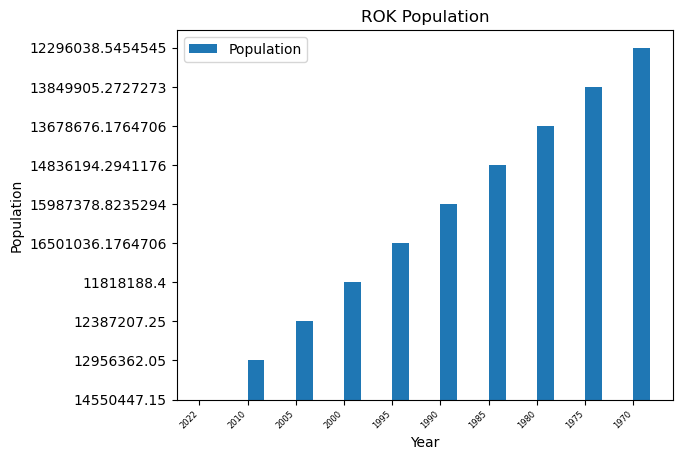

In [253]:
# 05.20.10
# plot population trend to date
# assign variable for plot components as dt03-dt12
# dt03-dt12

fig, ax = plt.subplots()
x = range(len(dt03_dt12_y))
width = 0.35
ax.bar([i + width/2 for i in x], dt03_dt12_y, width, label='Population')
ax.set_xticks(x)
ax.set_xticklabels(dt03_dt12_x)
ax.set_title('ROK Population')
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.legend()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=6
)
plt.show()

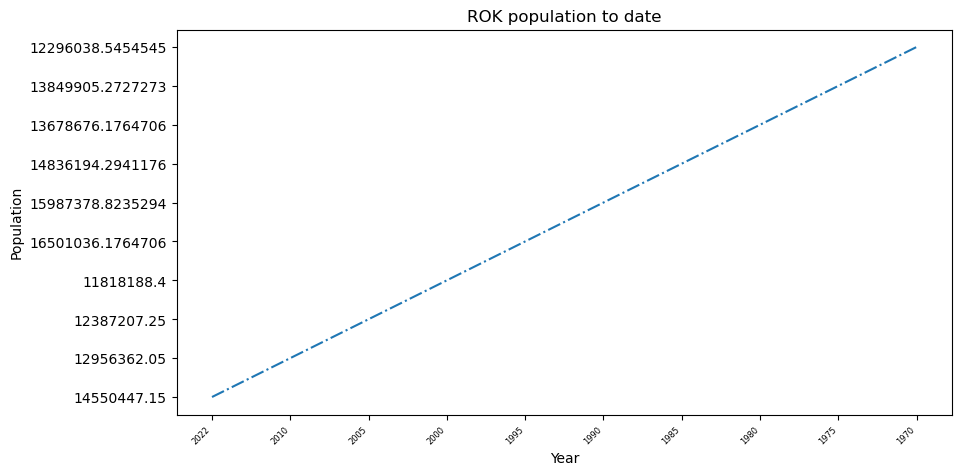

In [254]:
# 05.20.11
# plot population trend to date
# assign variable for plot components as # dt03-dt12
# dt03-dt12

dt03_dt12_fig = plt.figure(figsize = (10, 5))
plt.plot(dt03_dt12_x, dt03_dt12_y, '-.')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=6
)
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("ROK population to date")
plt.show()

In [255]:
# 05.20.12
# iterated over by row
# SQL database has 12 combined datasets
# return highest population
# dt03-dt12

for dt03_dt12_x, dt03_dt12_y in con.execute("SELECT count(*), Population FROM Population GROUP BY Population ORDER BY count(*) DESC"):
    print("highest population: {}".format(dt03_dt12_y, dt03_dt12_x))
    break

highest population: 16501036.1764706


In [256]:
# 05.20.12
# iterated over by row
# SQL database has 12 combined datasets
# return lowest population
# dt03-dt12

for dt03_dt12_x, dt03_dt12_y in con.execute("SELECT count(*), Population FROM Population GROUP BY Population ORDER BY count(*) ASC"):
    print("lowest population: {}".format(dt03_dt12_y, dt03_dt12_x))
    break

lowest population: 11818188.4


In [257]:
# 05.21.01
# combine variables into new df
# compiles 19 rows: 01-19
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt01

# print(dt01_yr_x)

In [258]:
# 05.22.01
# combine variables into new df
# compiles 19 rows: 01-19
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt02

# print(dt02_yr_x)

In [259]:
# 05.23.01
# combine variables into new df
# compiles 19 rows: 01-19
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt03

np.random.seed(123)
dt03_yr_y = {
            '00':dt03_00_flt,
            '01':dt03_01_flt,
            '02':dt03_02_flt,
            '03':dt03_03_flt,
            '04':dt03_04_flt,
            '05':dt03_05_flt,
            '06':dt03_06_flt,
            '07':dt03_07_flt,
            '08':dt03_08_flt,
            '09':dt03_09_flt,
            '10':dt03_10_flt,
            '11':dt03_11_flt,
            '12':dt03_12_flt,
            '13':dt03_13_flt,
            '14':dt03_14_flt,
            '15':dt03_15_flt,
            '16':dt03_16_flt,
            '17':dt03_17_flt,
            '18':dt03_18_flt,
            '19':dt03_19_flt
            }
dt03_yr_x = pd.DataFrame(dt03_yr_y, index=[0])
print(dt03_yr_x)

           00          01          02  ...         17        18         19
0  51692272.0  25835298.0  25856974.0  ...  2283238.0  211392.0  1162311.0

[1 rows x 20 columns]


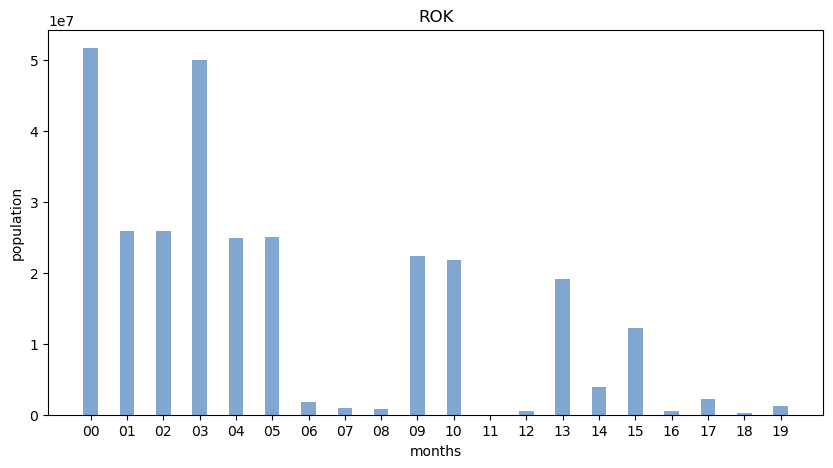

In [260]:
# 05.23.02
# plot total populations by year
# combines 9 datasets: dt03-dt12
# assign variable for plot components as _yr_y
# dt03

dt03_yr_y_yr = list(dt03_yr_y.keys())
dt03_yr_y_val = list(dt03_yr_y.values())
dt03_yr_y_fig = plt.figure(figsize = (10, 5))
plt.bar(dt03_yr_y_yr, dt03_yr_y_val, color ='#81A7D1', width = 0.4)
plt.xlabel("months")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [261]:
# 05.24.01
# combine variables into new df
# compiles 19 rows: 01-19
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt04

np.random.seed(123)
dt04_yr_y = {
            '00':dt04_00_flt,
            '01':dt04_01_flt,
            '02':dt04_02_flt,
            '03':dt04_03_flt,
            '04':dt04_04_flt,
            '05':dt04_05_flt,
            '06':dt04_06_flt,
            '07':dt04_07_flt,
            '08':dt04_08_flt,
            '09':dt04_09_flt,
            '10':dt04_10_flt,
            '11':dt04_11_flt,
            '12':dt04_12_flt,
            '13':dt04_13_flt,
            '14':dt04_14_flt,
            '15':dt04_15_flt,
            '16':dt04_16_flt,
            '17':dt04_17_flt,
            '18':dt04_18_flt,
            '19':dt04_19_flt
            }
dt04_yr_x = pd.DataFrame(dt04_yr_y, index=[0])
print(dt04_yr_x)

           00          01          02  ...         17        18        19
0  48580293.0  24167098.0  24413195.0  ...  1314452.0  161393.0  303097.0

[1 rows x 20 columns]


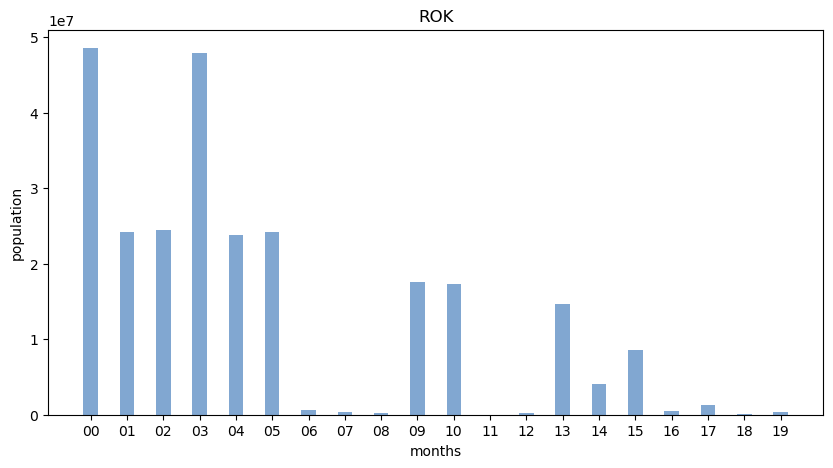

In [262]:
# 05.24.02
# plot total populations by year
# combines 9 datasets: dt03-dt12
# assign variable for plot components as _yr_y
# dt04

dt04_yr_y_yr = list(dt04_yr_y.keys())
dt04_yr_y_val = list(dt04_yr_y.values())
dt04_yr_y_fig = plt.figure(figsize = (10, 5))
plt.bar(dt04_yr_y_yr, dt04_yr_y_val, color ='#81A7D1', width = 0.4)
plt.xlabel("months")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [263]:
# 05.25.01
# combine variables into new df
# compiles 19 rows: 01-19
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt05

np.random.seed(123)
dt05_yr_y = {
            '00':dt05_00_flt,
            '01':dt05_01_flt,
            '02':dt05_02_flt,
            '03':dt05_03_flt,
            '04':dt05_04_flt,
            '05':dt05_05_flt,
            '06':dt05_06_flt,
            '07':dt05_07_flt,
            '08':dt05_08_flt,
            '09':dt05_09_flt,
            '10':dt05_10_flt,
            '11':dt05_11_flt,
            '12':dt05_12_flt,
            '13':dt05_13_flt,
            '14':dt05_14_flt,
            '15':dt05_15_flt,
            '16':dt05_16_flt,
            '17':dt05_17_flt,
            '18':dt05_18_flt,
            '19':dt05_19_flt
            }
dt05_yr_x = pd.DataFrame(dt05_yr_y, index=[0])
print(dt05_yr_x)

           00          01          02  ...         17        18        19
0  47278951.0  23623954.0  23654997.0  ...  1229208.0  208690.0  206511.0

[1 rows x 20 columns]


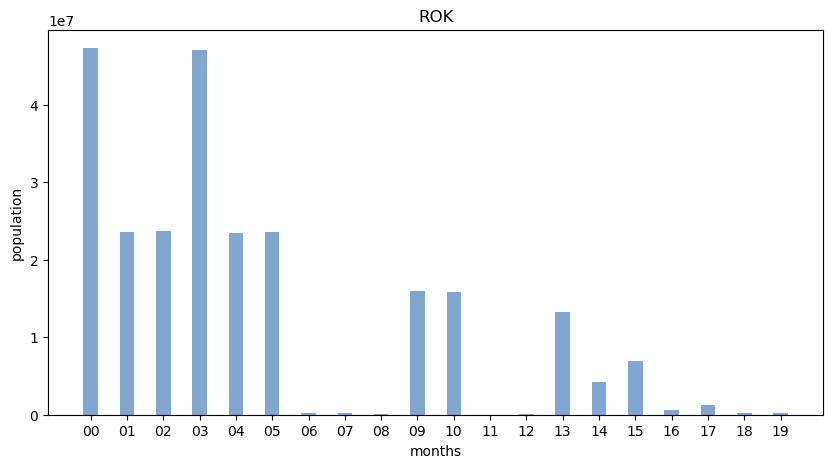

In [264]:
# 05.25.02
# plot total populations by year
# combines 19 rows: 01-19
# assign variable for plot components as _yr_y
# dt05

dt05_yr_y_yr = list(dt05_yr_y.keys())
dt05_yr_y_val = list(dt05_yr_y.values())
dt05_yr_y_fig = plt.figure(figsize = (10, 5))
plt.bar(dt05_yr_y_yr, dt05_yr_y_val, color ='#81A7D1', width = 0.4)
plt.xlabel("months")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [265]:
# 05.26.01
# combine variables into new df
# compiles 19 rows: 01-19
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt06

np.random.seed(123)
dt06_yr_y = {
            '00':dt06_00_flt,
            '01':dt06_01_flt,
            '02':dt06_02_flt,
            '03':dt06_03_flt,
            '04':dt06_04_flt,
            '05':dt06_05_flt,
            '06':dt06_06_flt,
            '07':dt06_07_flt,
            '08':dt06_08_flt,
            '09':dt06_09_flt,
            '10':dt06_10_flt,
            '11':dt06_11_flt,
            '12':dt06_12_flt,
            '13':dt06_13_flt,
            '14':dt06_14_flt,
            '15':dt06_15_flt,
            '16':dt06_16_flt,
            '17':dt06_17_flt,
            '18':dt06_18_flt,
            '19':dt06_19_flt
            }
dt06_yr_x = pd.DataFrame(dt06_yr_y, index=[0])
print(dt06_yr_x)

           00          01          02  ...        17        18       19
0  46136101.0  23158582.0  22977519.0  ...  472236.0  401470.0  91814.0

[1 rows x 20 columns]


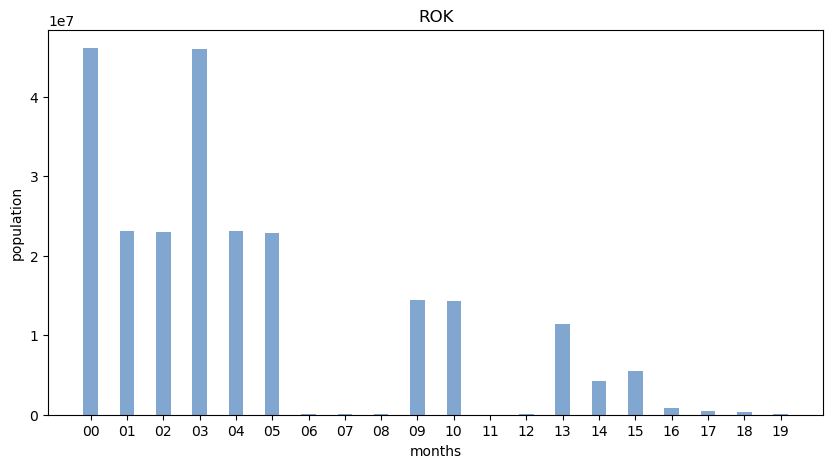

In [266]:
# 05.26.02
# plot total populations by year
# combines 19 rows: 01-19
# assign variable for plot components as _yr_y
# dt06

dt06_yr_y_yr = list(dt06_yr_y.keys())
dt06_yr_y_val = list(dt06_yr_y.values())
dt06_yr_y_fig = plt.figure(figsize = (10, 5))
plt.bar(dt06_yr_y_yr, dt06_yr_y_val, color ='#81A7D1', width = 0.4)
plt.xlabel("months")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [267]:
# 05.27.01
# combine variables into new df
# compiles 16 rows: 01-16
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt07

np.random.seed(123)
dt07_yr_y = {
            '00':dt07_00_flt,
            '01':dt07_01_flt,
            '02':dt07_02_flt,
            '03':dt07_03_flt,
            '04':dt07_04_flt,
            '05':dt07_05_flt,
            '06':dt07_06_flt,
            '07':dt07_07_flt,
            '08':dt07_08_flt,
            '09':dt07_09_flt,
            '10':dt07_10_flt,
            '11':dt07_11_flt,
            '12':dt07_12_flt,
            '13':dt07_13_flt,
            '14':dt07_14_flt,
            '15':dt07_15_flt,
            '16':dt07_16_flt
            }
dt07_yr_x = pd.DataFrame(dt07_yr_y, index=[0])
print(dt07_yr_x)

           00          01          02  ...       14       15       16
0  44608726.0  22389324.0  22219402.0  ...  55016.0  31972.0  23044.0

[1 rows x 17 columns]


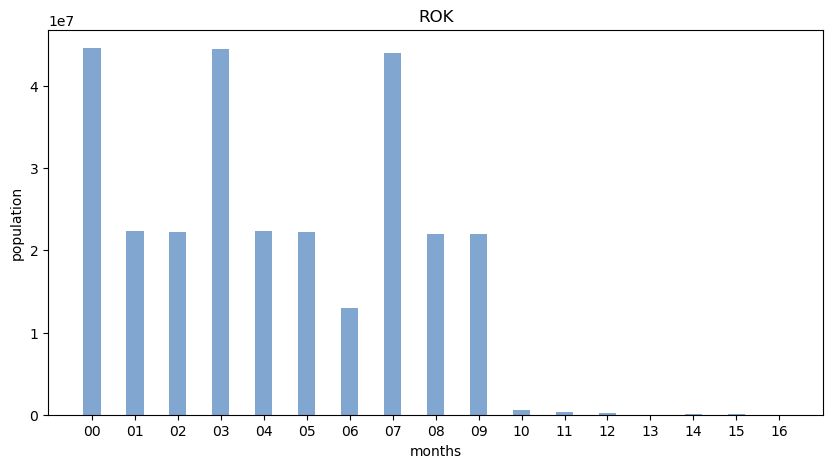

In [268]:
# 05.27.02
# plot total populations by year
# combines 16 rows: 01-16
# assign variable for plot components as _yr_y
# dt07

dt07_yr_y_yr = list(dt07_yr_y.keys())
dt07_yr_y_val = list(dt07_yr_y.values())
dt07_yr_y_fig = plt.figure(figsize = (10, 5))
plt.bar(dt07_yr_y_yr, dt07_yr_y_val, color ='#81A7D1', width = 0.4)
plt.xlabel("months")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [269]:
# 05.28.01
# combine variables into new df
# compiles 16 rows: 01-16
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt08

np.random.seed(123)
dt08_yr_y = {
            '00':dt08_00_flt,
            '01':dt08_01_flt,
            '02':dt08_02_flt,
            '03':dt08_03_flt,
            '04':dt08_04_flt,
            '05':dt08_05_flt,
            '06':dt08_06_flt,
            '07':dt08_07_flt,
            '08':dt08_08_flt,
            '09':dt08_09_flt,
            '10':dt08_10_flt,
            '11':dt08_11_flt,
            '12':dt08_12_flt,
            '13':dt08_13_flt,
            '14':dt08_14_flt,
            '15':dt08_15_flt,
            '16':dt08_16_flt
            }
dt08_yr_x = pd.DataFrame(dt08_yr_y, index=[0])
print(dt08_yr_x)

           00          01          02  ...       14       15      16
0  43410899.0  21782154.0  21628745.0  ...  20525.0  11235.0  9290.0

[1 rows x 17 columns]


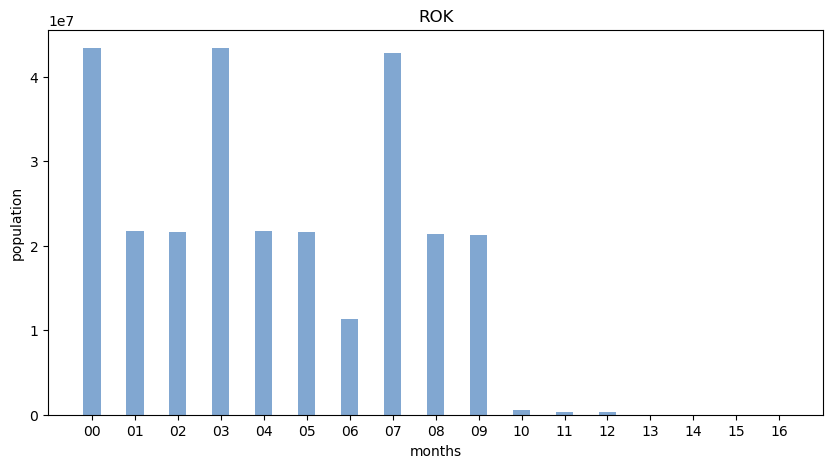

In [270]:
# 05.28.02
# plot total populations by year
# combines 16 rows: 01-16
# assign variable for plot components as _yr_y
# dt08

dt08_yr_y_yr = list(dt08_yr_y.keys())
dt08_yr_y_val = list(dt08_yr_y.values())
dt08_yr_y_fig = plt.figure(figsize = (10, 5))
plt.bar(dt08_yr_y_yr, dt08_yr_y_val, color ='#81A7D1', width = 0.4)
plt.xlabel("months")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [271]:
# 05.29.01
# combine variables into new df
# compiles 16 rows: 01-16
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt09

np.random.seed(123)
dt09_yr_y = {
            '00':dt09_00_flt,
            '01':dt09_01_flt,
            '02':dt09_02_flt,
            '03':dt09_03_flt,
            '04':dt09_04_flt,
            '05':dt09_05_flt,
            '06':dt09_06_flt,
            '07':dt09_07_flt,
            '08':dt09_08_flt,
            '09':dt09_09_flt,
            '10':dt09_10_flt,
            '11':dt09_11_flt,
            '12':dt09_12_flt,
            '13':dt09_13_flt,
            '14':dt09_14_flt,
            '15':dt09_15_flt,
            '16':dt09_16_flt
            }
dt09_yr_x = pd.DataFrame(dt09_yr_y, index=[0])
print(dt09_yr_x)

           00          01          02  ...       14       15       16
0  40448486.0  20243765.0  20204721.0  ...  28834.0  16201.0  12633.0

[1 rows x 17 columns]


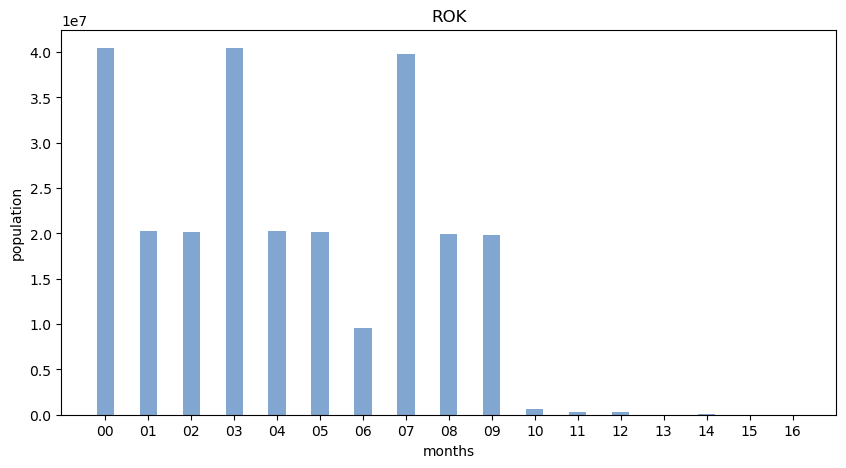

In [272]:
# 05.29.02
# plot total populations by year
# combines 16 rows: 01-16
# assign variable for plot components as _yr_y
# dt09

dt09_yr_y_yr = list(dt09_yr_y.keys())
dt09_yr_y_val = list(dt09_yr_y.values())
dt09_yr_y_fig = plt.figure(figsize = (10, 5))
plt.bar(dt09_yr_y_yr, dt09_yr_y_val, color ='#81A7D1', width = 0.4)
plt.xlabel("months")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [273]:
# 05.30.01
# combine variables into new df
# compiles 16 rows: 01-16
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt10

np.random.seed(123)
dt10_yr_y = {
            '00':dt10_00_flt,
            '01':dt10_01_flt,
            '02':dt10_02_flt,
            '03':dt10_03_flt,
            '04':dt10_04_flt,
            '05':dt10_05_flt,
            '06':dt10_06_flt,
            '07':dt10_07_flt,
            '08':dt10_08_flt,
            '09':dt10_09_flt,
            '10':dt10_10_flt,
            '11':dt10_11_flt,
            '12':dt10_12_flt,
            '13':dt10_13_flt,
            '14':dt10_14_flt,
            '15':dt10_15_flt,
            '16':dt10_16_flt
            }
dt10_yr_x = pd.DataFrame(dt10_yr_y, index=[0])
print(dt10_yr_x)

           00          01          02  ...       14       15       16
0  37436315.0  18767201.0  18669114.0  ...  29500.0  17895.0  11605.0

[1 rows x 17 columns]


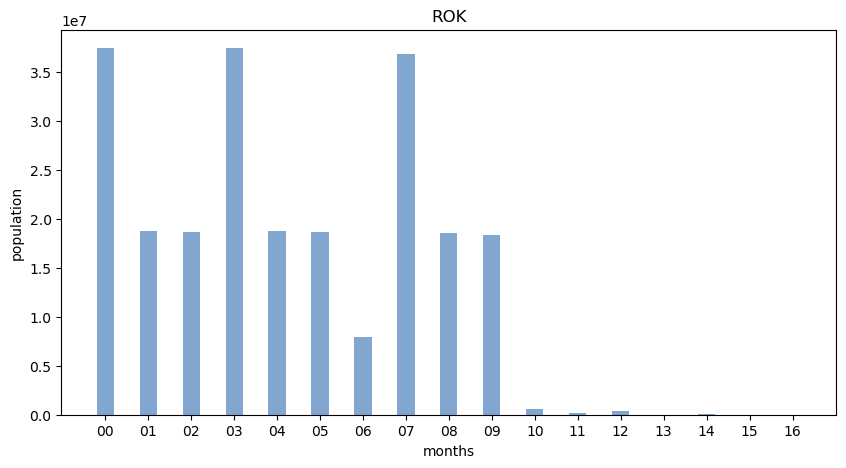

In [274]:
# 05.30.02
# plot total populations by year
# combines 16 rows: 01-16
# assign variable for plot components as _yr_y
# dt10

dt10_yr_y_yr = list(dt10_yr_y.keys())
dt10_yr_y_val = list(dt10_yr_y.values())
dt10_yr_y_fig = plt.figure(figsize = (10, 5))
plt.bar(dt10_yr_y_yr, dt10_yr_y_val, color ='#81A7D1', width = 0.4)
plt.xlabel("months")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [275]:
# 05.31.01
# combine variables into new df
# compiles 11 rows: 01-11
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt11

np.random.seed(123)
dt11_yr_y = {
            '00':dt11_00_flt,
            '01':dt11_01_flt,
            '02':dt11_02_flt,
            '03':dt11_03_flt,
            '04':dt11_04_flt,
            '05':dt11_05_flt,
            '06':dt11_06_flt,
            '07':dt11_07_flt,
            '08':dt11_08_flt,
            '09':dt11_09_flt,
            '10':dt11_10_flt,
            '11':dt11_11_flt
            }
dt11_yr_x = pd.DataFrame(dt11_yr_y, index=[0])
print(dt11_yr_x)

          00         01      02  ...       09       10       11
0  6761239.0  6754257.0  6982.0  ...  27648.0  15998.0  11650.0

[1 rows x 12 columns]


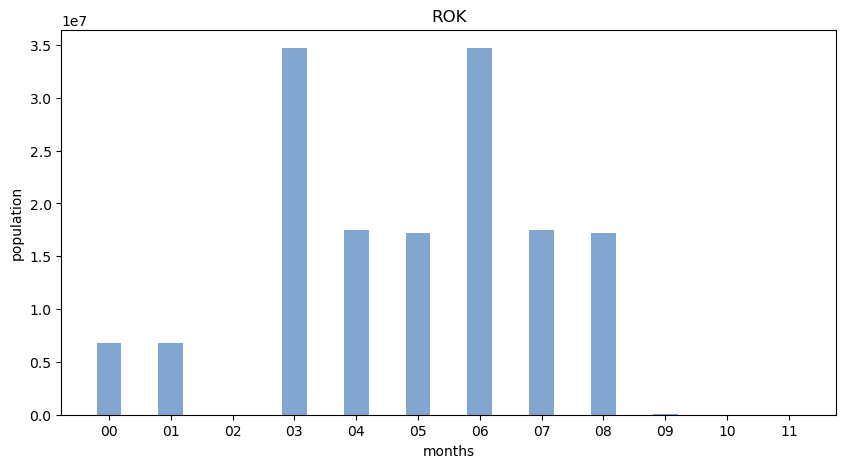

In [276]:
# 05.31.02
# plot total populations by year
# combines 11 rows: 01-11
# assign variable for plot components as _yr_y
# dt11

dt11_yr_y_yr = list(dt11_yr_y.keys())
dt11_yr_y_val = list(dt11_yr_y.values())
dt11_yr_y_fig = plt.figure(figsize = (10, 5))
plt.bar(dt11_yr_y_yr, dt11_yr_y_val, color ='#81A7D1', width = 0.4)
plt.xlabel("months")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [277]:
# 05.32.01
# combine variables into new df
# compiles 11 rows: 01-11
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt12

np.random.seed(123)
dt12_yr_y = {
            '00':dt12_00_flt,
            '01':dt12_01_flt,
            '02':dt12_02_flt,
            '03':dt12_03_flt,
            '04':dt12_04_flt,
            '05':dt12_05_flt,
            '06':dt12_06_flt,
            '07':dt12_07_flt,
            '08':dt12_08_flt,
            '09':dt12_09_flt,
            '10':dt12_10_flt,
            '11':dt12_11_flt
            }
dt12_yr_x = pd.DataFrame(dt12_yr_y, index=[0])
print(dt12_yr_x)

          00         01      02  ...       09       10       11
0  5863440.0  5856901.0  6539.0  ...  30402.0  16062.0  14340.0

[1 rows x 12 columns]


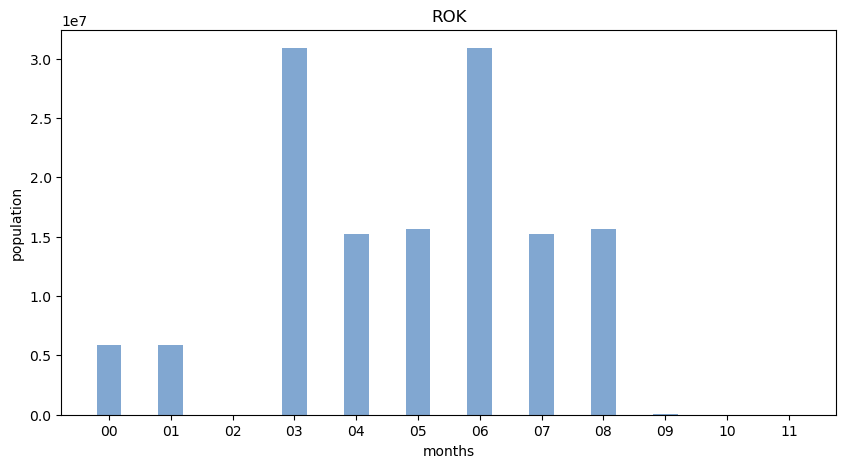

In [278]:
# 05.32.02
# plot total populations by year
# combines 11 rows: 01-11
# assign variable for plot components as _yr_y
# dt12

dt12_yr_y_yr = list(dt12_yr_y.keys())
dt12_yr_y_val = list(dt12_yr_y.values())
dt12_yr_y_fig = plt.figure(figsize = (10, 5))
plt.bar(dt12_yr_y_yr, dt12_yr_y_val, color ='#81A7D1', width = 0.4)
plt.xlabel("months")
plt.ylabel("population")
plt.title("ROK")
plt.show()

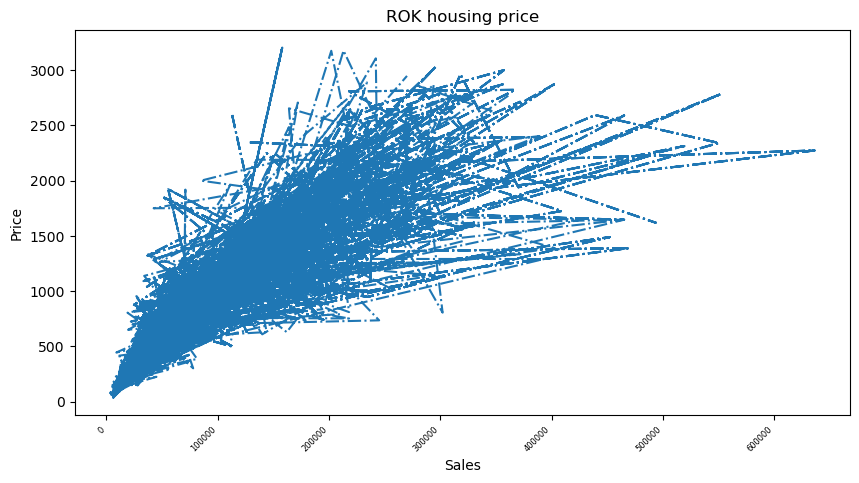

In [279]:
# 04.33.01
# plot population trend to date
# assign variable for plot components as _00
# dt15

dt15_00_x = dt15['avg_sales']
dt15_00_y = dt15['pricePerArea']
dt15_00_fig = plt.figure(figsize = (10, 5))
plt.plot(dt15_00_x, dt15_00_y, '-.')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=6
)
plt.xlabel("Sales")
plt.ylabel("Price")
plt.title("ROK housing price")
plt.show()

In [280]:
# 05.34.01
# plot total populations by year
# combine variables into new df
# compiles 9 datasets: dt03-dt12
# assign variable for new dataset as _ttl_x
# return df
# dt_x, dt_y

np.random.seed(123)
dt_ttl_y = {
            '1970':dt12_ttl,
            '1975':dt11_ttl,
            '1980':dt10_ttl,
            '1985':dt09_ttl,
            '1990':dt08_ttl,
            '1995':dt07_ttl,
            '2000':dt06_ttl,
            '2005':dt05_ttl,
            '2010':dt04_ttl,
            '2022':dt03_ttl
            }
dt_ttl_x = pd.DataFrame(dt_ttl_y, index=[0])
print(dt_ttl_x)

          1970         1975         1980  ...         2005         2010         2022
0  135256424.0  152348958.0  232537495.0  ...  247744145.0  259127241.0  291008943.0

[1 rows x 10 columns]


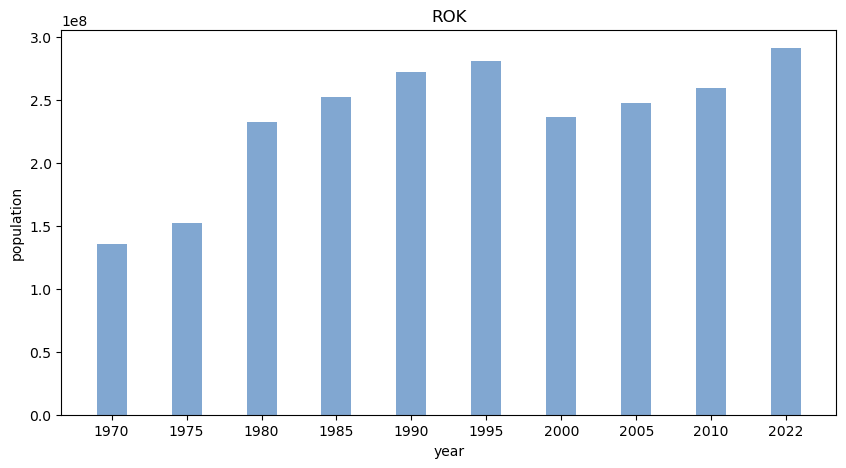

In [281]:
# 05.34.02
# plot total populations by year
# combines 9 datasets: dt03-dt12
# assign variable for plot components as _ttl_y
# dt_x, dt_y

dt_ttl_y_yr = list(dt_ttl_y.keys())
dt_ttl_y_val = list(dt_ttl_y.values())
dt_ttl_y_fig = plt.figure(figsize = (10, 5))
plt.bar(dt_ttl_y_yr, dt_ttl_y_val, color ='#81A7D1', width = 0.4)
plt.xlabel("year")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [282]:
# 05.35.01
# combine variables into new df
# compiles 9 datasets: dt03-dt12
# assign variable for new dataset as _x
# return df
# dt_x, dt_y

np.random.seed(123)
dt_mn_y = {
        '1970':dt12_x,
        '1975':dt11_x,
        '1980':dt10_x,
        '1985':dt09_x,
        '1990':dt08_x,
        '1995':dt07_x,
        '2000':dt06_x,
        '2005':dt05_x,
        '2010':dt04_x,
        '2022':dt03_x
          }
dt_mn_x = pd.DataFrame(dt_mn_y, index=[0])
print(dt_mn_x)

           1970          1975  ...         2010         2022
0  1.229604e+07  1.384991e+07  ...  12956362.05  14550447.15

[1 rows x 10 columns]


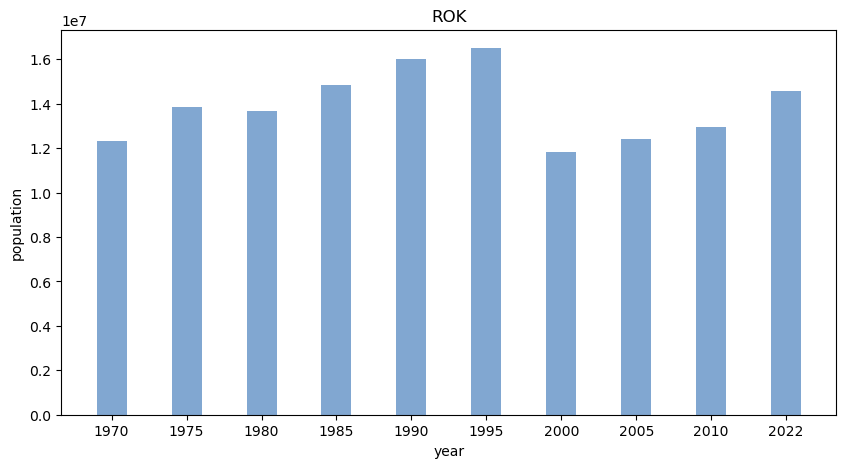

In [283]:
# 05.35.02
# plot total populations by year
# combines 9 datasets: dt03-dt12
# assign variable for plot components as _mn_y
# dt_x, dt_y

dt_mn_yr = list(dt_mn_y.keys())
dt_mn_val = list(dt_mn_y.values())
dt_mn_fig = plt.figure(figsize = (10, 5))
plt.bar(dt_mn_yr, dt_mn_val, color ='#81A7D1', width = 0.4)
plt.xlabel("year")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [284]:
# 05.36.01
# combine variables into new df
# compiles 9 datasets: dt03-dt12
# assign variable for new dataset as _00
# return df
# dt_00

np.random.seed(123)
dt_00_y = {
        '1970':dt12_00_flt,
        '1975':dt11_00_flt,
        '1980':dt10_00_flt,
        '1985':dt09_00_flt,
        '1990':dt08_00_flt,
        '1995':dt07_00_flt,
        '2000':dt06_00_flt,
        '2005':dt05_00_flt,
        '2010':dt04_00_flt,
        '2022':dt03_00_flt
          }
dt_00_x = pd.DataFrame(dt_00_y, index=[0])
print(dt_00_x)

        1970       1975        1980  ...        2005        2010        2022
0  5863440.0  6761239.0  37436315.0  ...  47278951.0  48580293.0  51692272.0

[1 rows x 10 columns]


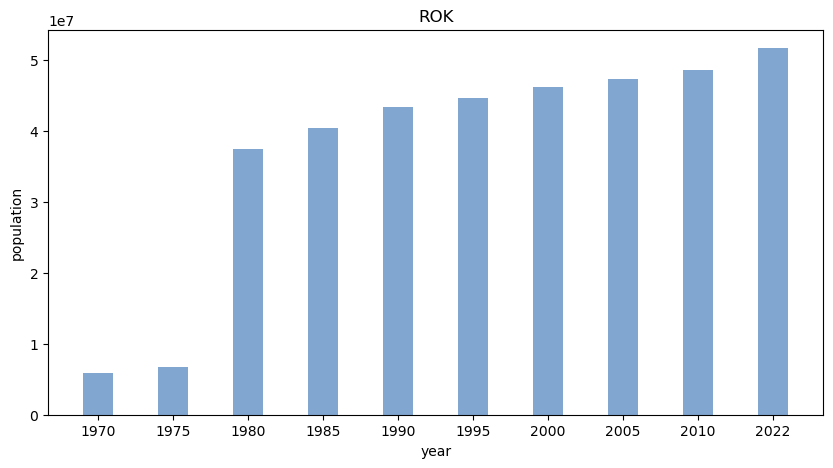

In [285]:
# 05.36.02
# plot total populations by year
# combines 9 datasets: dt03-dt12
# assign variable for plot components as _00
# dt_00

dt_00_yr = list(dt_00_y.keys())
dt_00_val = list(dt_00_y.values())
dt_00_fig = plt.figure(figsize = (10, 5))
plt.bar(dt_00_yr, dt_00_val, color ='#81A7D1', width = 0.4)
plt.xlabel("year")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [286]:
# 05.37.01
# create vertices for total population
# assign variable for new dataset as _00
# return df
# dt_00_vt

dt_00_dt = [
        ['1970', dt12_00_flt],
        ['1975', dt11_00_flt],
        ['1980', dt10_00_flt],
        ['1985', dt09_00_flt],
        ['1990', dt08_00_flt],
        ['1995', dt07_00_flt],
        ['2000', dt06_00_flt],
        ['2005', dt05_00_flt],
        ['2010', dt04_00_flt],
        ['2022', dt03_00_flt]
        ]
dt_00_vt = pd.DataFrame(dt_00_dt, columns=['Year', 'Population'])

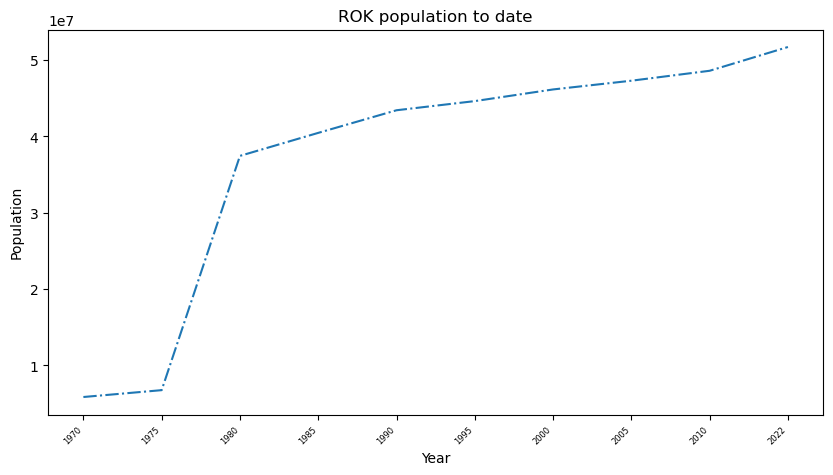

In [287]:
# 05.37.02
# plot population trend to date
# assign variable for plot components as _00
# dt_00_vt

dt_00_vt_x = dt_00_vt['Year']
dt_00_vt_y = dt_00_vt['Population']
dt_00_vt_fig = plt.figure(figsize = (10, 5))
plt.plot(dt_00_vt_x, dt_00_vt_y, '-.')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=6
)
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("ROK population to date")
plt.show()

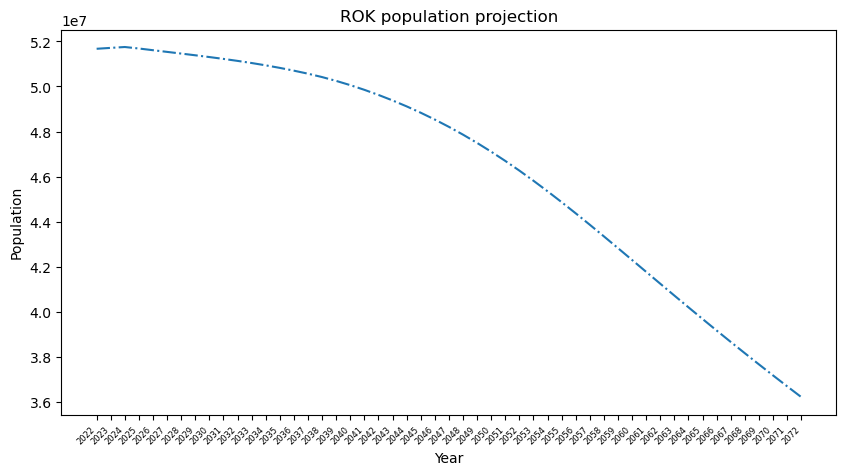

In [288]:
# 05.38.01
# plot total populations by year
# combines 9 datasets: dt03-dt12
# assign variable for plot components as _00
# dt_00

dt14_00_x = dt14_00['Year']
dt14_00_y = dt14_00['Population']
dt14_00_fig = plt.figure(figsize = (10, 5))
plt.plot(dt14_00_x, dt14_00_y, '-.')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=6
)
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("ROK population projection")
plt.show()

In [289]:
# Summary of Term Project DSC540_WK12_term_Schreck-Kim.pdf

In [290]:
# Now that you have cleaned and transformed your 3 datasets, you need to load them into a database. 
# You can choose what kind of database (SQLLite or MySQL, Postgre SQL are all free options). 
# You will want to load each dataset into SQL Lite as an individual table and then you must join the datasets together in Python into 1 dataset.
# Once all the data is merged together in your database, create 5 visualizations that demonstrate the data you have cleansed. 
# You should have at least 2 visualizations that have data from more than one source (meaning, 
# if you have 3 tables, you must have visualizations that span across 2 of the tables – 
# you are also welcome to use your consolidated dataset that you created in the previous step, if you do that, you have met this requirement).
# For the visualization portion of the project, you are welcome to use a python library like 
# Matplotlib, Seaborn, or an R package ggPlot2, Plotly, or Tableau/PowerBI.
# PowerBI is a free tool that could be used – Tableau only has a free web author. 
# If your use Tableau/PowerBI you need to submit a PDF with your assignment vs the Tableau/PowerBI file. /p>
# Clearly label each visualization. Submit your code for merging and storing in the database, 
# with your code for the visualizations along with a 250-500-word summary of what you learned and had to do to complete the project. 
# In your write-up, make sure to address the ethical implications of cleansing data and your project topic. 
# You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.
# Remember – your GitHub repository can act as a portfolio for potential employers! 
# I would highly suggest using this to submit your work, so you can fill it with good content that demonstrates the projects you are working on!